**Imports**

In [2]:
# =============================================================================
# ANALYSE EXPLORATOIRE - DATASET E-COMMERCE
# Auteur : Abderrahmane NAJEH
# Date : 2025
# =============================================================================

# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Affichage complet des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Imports avancés
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("✅ Librairies importées avec succès!")

✅ Librairies importées avec succès!


**Chargement des données**

In [3]:
# Chargement du dataset
df = pd.read_csv('../data/data.csv', encoding='ISO-8859-1')

# Première visualisation
print(f"📊 Dataset chargé avec succès!")
print(f"   → {df.shape[0]:,} lignes")
print(f"   → {df.shape[1]} colonnes")

📊 Dataset chargé avec succès!
   → 541,909 lignes
   → 8 colonnes


**Aperçu des données**

In [4]:
# Aperçu des premières lignes
print("📋 APERÇU DES DONNÉES")
print("=" * 50)
df.head(10)

📋 APERÇU DES DONNÉES


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**Informations sur les colonnes**

In [5]:
# Informations sur les colonnes
print("📋 INFORMATIONS SUR LES COLONNES")
print("=" * 50)
df.info()

📋 INFORMATIONS SUR LES COLONNES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Statistiques descriptives**

In [6]:
# Statistiques descriptives
print("📊 STATISTIQUES DESCRIPTIVES")
print("=" * 50)
df.describe()

📊 STATISTIQUES DESCRIPTIVES


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Analyse des valeurs manquantes**

🔍 VALEURS MANQUANTES
             Valeurs manquantes  Pourcentage (%)
CustomerID               135080            24.93
Description                1454             0.27


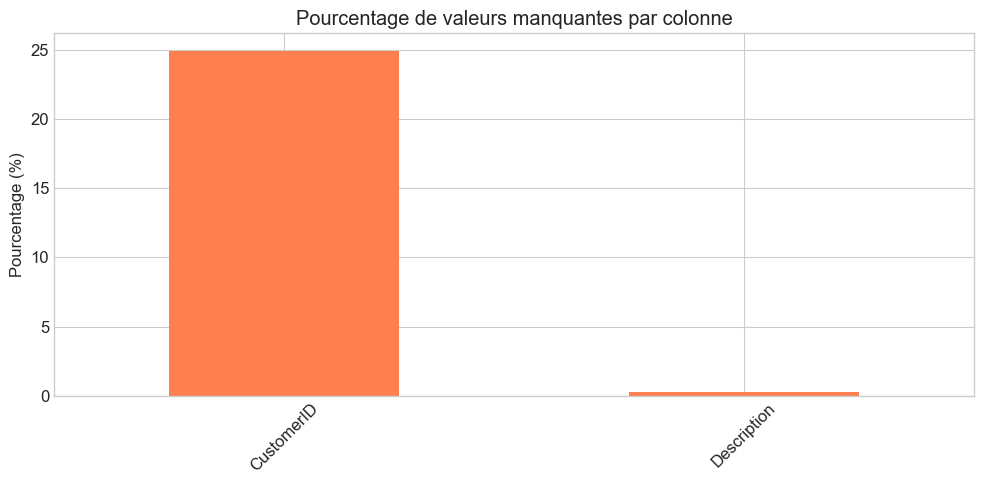


💾 Image sauvegardée : images/01_valeurs_manquantes.png


In [7]:
# =============================================================================
# ANALYSE DES VALEURS MANQUANTES
# =============================================================================

print("🔍 VALEURS MANQUANTES")
print("=" * 50)

# Compte des valeurs manquantes par colonne
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing,
    'Pourcentage (%)': missing_percent
}).sort_values('Pourcentage (%)', ascending=False)

print(missing_df[missing_df['Valeurs manquantes'] > 0])

# Visualisation
plt.figure(figsize=(10, 5))
missing_df[missing_df['Valeurs manquantes'] > 0]['Pourcentage (%)'].plot(kind='bar', color='coral')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.ylabel('Pourcentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/01_valeurs_manquantes.png', dpi=150)
plt.show()

print("\n💾 Image sauvegardée : images/01_valeurs_manquantes.png")

**Analyse des doublons**

In [8]:
# =============================================================================
# ANALYSE DES DOUBLONS
# =============================================================================

print("🔍 DOUBLONS")
print("=" * 50)

doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons:,}")
print(f"Pourcentage : {doublons/len(df)*100:.2f}%")

🔍 DOUBLONS
Nombre de doublons : 5,268
Pourcentage : 0.97%


**Nettoyage des données**

In [9]:
# =============================================================================
# NETTOYAGE DES DONNÉES
# =============================================================================

print("🧹 NETTOYAGE EN COURS...")
print("=" * 50)

# Taille initiale
taille_initiale = len(df)
print(f"Taille initiale : {taille_initiale:,} lignes")

# 1. Suppression des doublons
df_clean = df.drop_duplicates()
print(f"Après suppression doublons : {len(df_clean):,} lignes")

# 2. Suppression des lignes sans CustomerID (optionnel selon l'analyse)
df_clean = df_clean.dropna(subset=['CustomerID'])
print(f"Après suppression CustomerID manquants : {len(df_clean):,} lignes")

# 3. Suppression des quantités négatives ou nulles
df_clean = df_clean[df_clean['Quantity'] > 0]
print(f"Après suppression quantités ≤ 0 : {len(df_clean):,} lignes")

# 4. Suppression des prix négatifs ou nuls
df_clean = df_clean[df_clean['UnitPrice'] > 0]
print(f"Après suppression prix ≤ 0 : {len(df_clean):,} lignes")

# Résumé
taille_finale = len(df_clean)
perte = taille_initiale - taille_finale
print(f"\n✅ Nettoyage terminé!")
print(f"   → Lignes supprimées : {perte:,} ({perte/taille_initiale*100:.1f}%)")
print(f"   → Lignes restantes : {taille_finale:,}")

🧹 NETTOYAGE EN COURS...
Taille initiale : 541,909 lignes
Après suppression doublons : 536,641 lignes
Après suppression CustomerID manquants : 401,604 lignes
Après suppression quantités ≤ 0 : 392,732 lignes
Après suppression prix ≤ 0 : 392,692 lignes

✅ Nettoyage terminé!
   → Lignes supprimées : 149,217 (27.5%)
   → Lignes restantes : 392,692


**Création de nouvelles colonnes**

In [10]:
# =============================================================================
# FEATURE ENGINEERING
# =============================================================================

print("🔧 CRÉATION DE NOUVELLES COLONNES...")
print("=" * 50)

# Conversion de la date
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extraction des composantes de date
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

# Nom du jour
jours = {0:'Lundi', 1:'Mardi', 2:'Mercredi', 3:'Jeudi', 4:'Vendredi', 5:'Samedi', 6:'Dimanche'}
df_clean['DayName'] = df_clean['DayOfWeek'].map(jours)

# Calcul du montant total par ligne
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

print("✅ Nouvelles colonnes créées :")
print("   → Year, Month, Day, DayOfWeek, DayName, Hour")
print("   → TotalAmount (Quantity × UnitPrice)")

# Vérification
df_clean.head()

🔧 CRÉATION DE NOUVELLES COLONNES...
✅ Nouvelles colonnes créées :
   → Year, Month, Day, DayOfWeek, DayName, Hour
   → TotalAmount (Quantity × UnitPrice)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,DayOfWeek,Hour,DayName,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,8,Mercredi,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,Mercredi,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,8,Mercredi,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,Mercredi,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,Mercredi,20.34


**Vue d'ensemble des ventes**

In [11]:
# =============================================================================
# ANALYSE DES VENTES - VUE D'ENSEMBLE
# =============================================================================

print("📊 VUE D'ENSEMBLE DES VENTES")
print("=" * 50)

# KPIs globaux
ca_total = df_clean['TotalAmount'].sum()
nb_transactions = df_clean['InvoiceNo'].nunique()
nb_clients = df_clean['CustomerID'].nunique()
nb_produits = df_clean['StockCode'].nunique()
panier_moyen = ca_total / nb_transactions

print(f"💰 Chiffre d'affaires total : {ca_total:,.0f} €")
print(f"🧾 Nombre de transactions : {nb_transactions:,}")
print(f"👥 Nombre de clients uniques : {nb_clients:,}")
print(f"📦 Nombre de produits différents : {nb_produits:,}")
print(f"🛒 Panier moyen : {panier_moyen:,.2f} €")

📊 VUE D'ENSEMBLE DES VENTES
💰 Chiffre d'affaires total : 8,887,209 €
🧾 Nombre de transactions : 18,532
👥 Nombre de clients uniques : 4,338
📦 Nombre de produits différents : 3,665
🛒 Panier moyen : 479.56 €


**Évolution mensuelle des ventes**

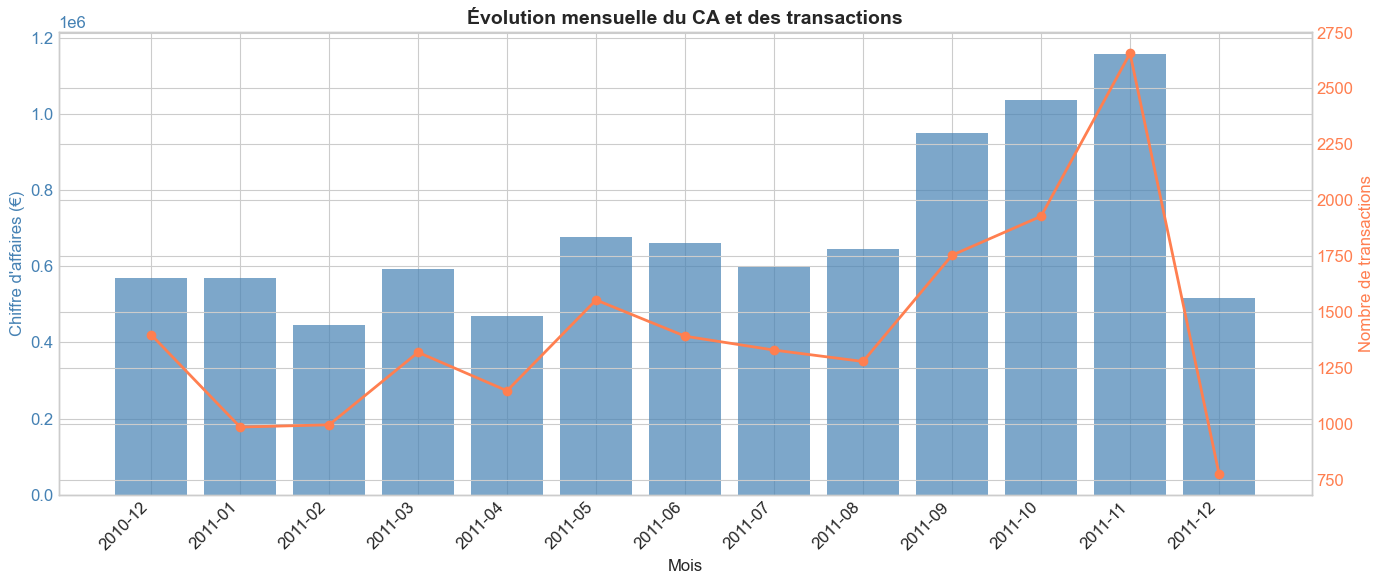

💾 Image sauvegardée : images/02_evolution_mensuelle.png


In [12]:
# =============================================================================
# ÉVOLUTION MENSUELLE DES VENTES
# =============================================================================

# Agrégation par mois
monthly_sales = df_clean.groupby([df_clean['InvoiceDate'].dt.to_period('M')]).agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

monthly_sales.columns = ['Mois', 'CA', 'Transactions', 'Clients']
monthly_sales['Mois'] = monthly_sales['Mois'].astype(str)

# Graphique
fig, ax1 = plt.subplots(figsize=(14, 6))

# Barres pour le CA
bars = ax1.bar(monthly_sales['Mois'], monthly_sales['CA'], color='steelblue', alpha=0.7, label='CA (€)')
ax1.set_xlabel('Mois')
ax1.set_ylabel('Chiffre d\'affaires (€)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(range(len(monthly_sales)))
ax1.set_xticklabels(monthly_sales['Mois'], rotation=45, ha='right')


# Ligne pour les transactions
ax2 = ax1.twinx()
ax2.plot(monthly_sales['Mois'], monthly_sales['Transactions'], color='coral', marker='o', linewidth=2, label='Transactions')
ax2.set_ylabel('Nombre de transactions', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

plt.title('Évolution mensuelle du CA et des transactions', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.savefig('../images/02_evolution_mensuelle.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/02_evolution_mensuelle.png")

**Analyse par jour de la semaine**

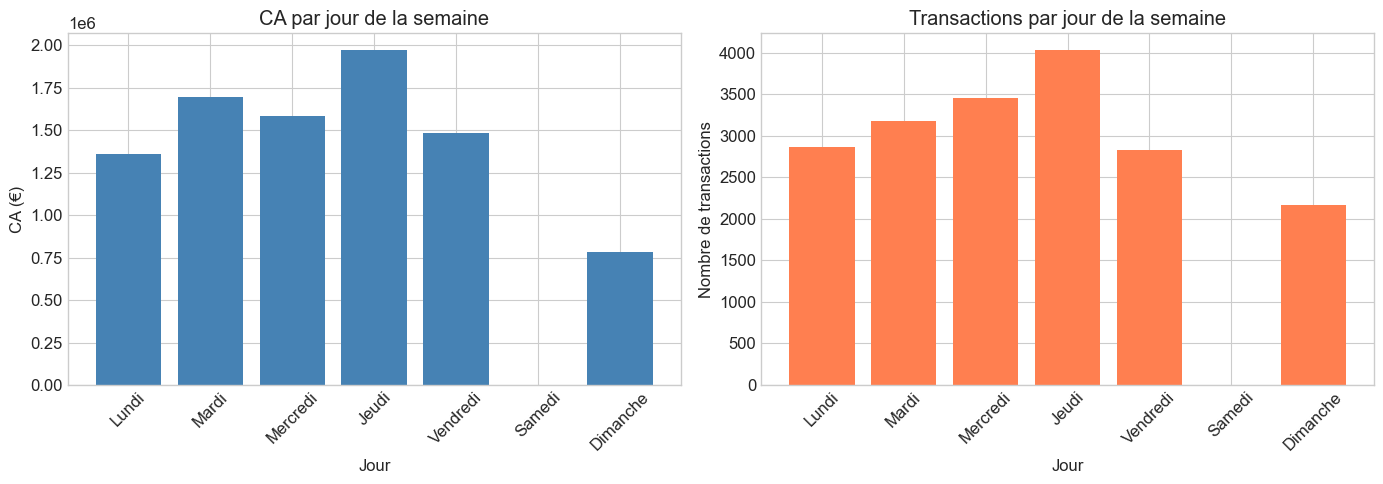

💾 Image sauvegardée : images/03_analyse_jour_semaine.png

📌 INSIGHT : Le Jeudi génère le plus de CA, le Dimanche le moins.


In [13]:
# =============================================================================
# ANALYSE PAR JOUR DE LA SEMAINE
# =============================================================================

# Agrégation par jour de la semaine
daily_sales = df_clean.groupby('DayName').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
}).reindex(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])

# Graphique
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CA par jour
axes[0].bar(daily_sales.index, daily_sales['TotalAmount'], color='steelblue')
axes[0].set_title('CA par jour de la semaine')
axes[0].set_xlabel('Jour')
axes[0].set_ylabel('CA (€)')
axes[0].tick_params(axis='x', rotation=45)

# Transactions par jour
axes[1].bar(daily_sales.index, daily_sales['InvoiceNo'], color='coral')
axes[1].set_title('Transactions par jour de la semaine')
axes[1].set_xlabel('Jour')
axes[1].set_ylabel('Nombre de transactions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../images/03_analyse_jour_semaine.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/03_analyse_jour_semaine.png")

# Insight
jour_max = daily_sales['TotalAmount'].idxmax()
jour_min = daily_sales['TotalAmount'].idxmin()
print(f"\n📌 INSIGHT : Le {jour_max} génère le plus de CA, le {jour_min} le moins.")

**Analyse par heure**

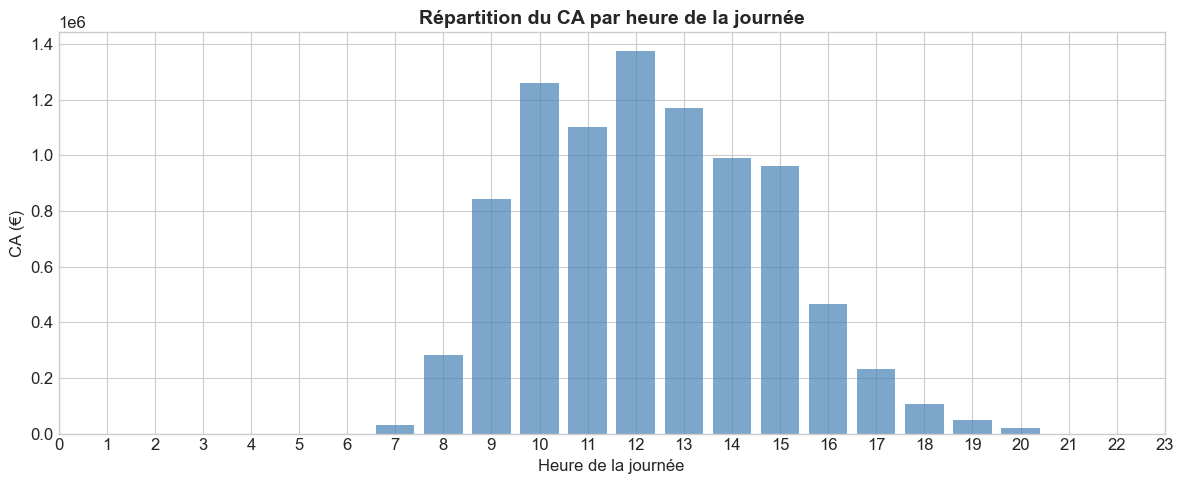

💾 Image sauvegardée : images/04_analyse_horaire.png

📌 INSIGHT : Le pic de ventes est à 12h.


In [14]:
# =============================================================================
# ANALYSE PAR HEURE DE LA JOURNÉE
# =============================================================================

# Agrégation par heure
hourly_sales = df_clean.groupby('Hour').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
})

# Graphique
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(hourly_sales.index, hourly_sales['TotalAmount'], color='steelblue', alpha=0.7)
ax.set_xlabel('Heure de la journée')
ax.set_ylabel('CA (€)')
ax.set_title('Répartition du CA par heure de la journée', fontsize=14, fontweight='bold')
ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.savefig('../images/04_analyse_horaire.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/04_analyse_horaire.png")

# Insight
heure_max = hourly_sales['TotalAmount'].idxmax()
print(f"\n📌 INSIGHT : Le pic de ventes est à {heure_max}h.")

**Top 10 pays**

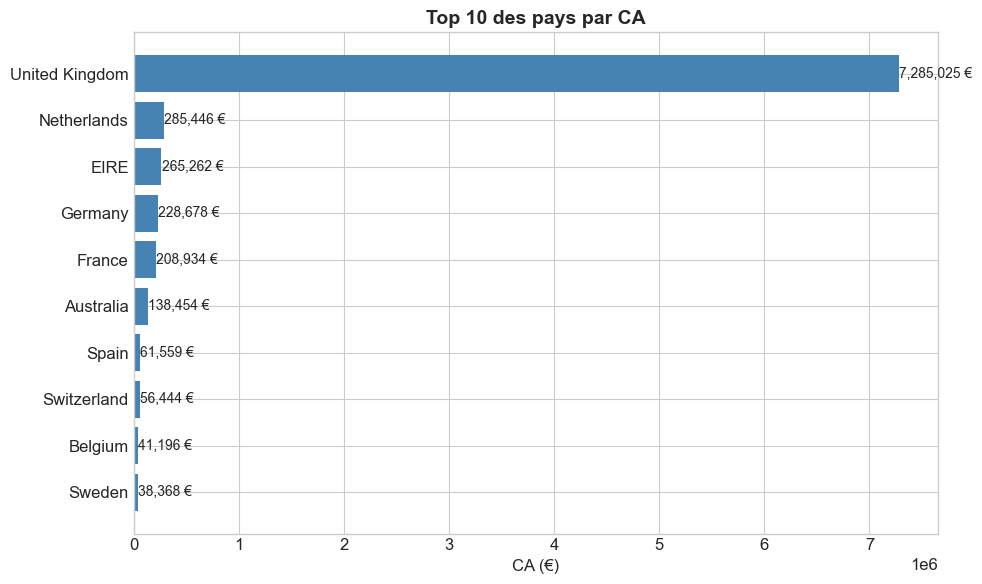

💾 Image sauvegardée : images/05_top_pays.png

📌 INSIGHT : United Kingdom représente 82.0% du CA total.


In [15]:
# =============================================================================
# ANALYSE PAR PAYS - TOP 10
# =============================================================================

# Top 10 pays par CA
top_countries = df_clean.groupby('Country')['TotalAmount'].sum().nlargest(10).sort_values(ascending=True)

# Graphique
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(top_countries.index, top_countries.values, color='steelblue')
ax.set_xlabel('CA (€)')
ax.set_title('Top 10 des pays par CA', fontsize=14, fontweight='bold')

# Ajouter les valeurs sur les barres
for bar, value in zip(bars, top_countries.values):
    ax.text(value + 1000, bar.get_y() + bar.get_height()/2, 
            f'{value:,.0f} €', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../images/05_top_pays.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/05_top_pays.png")

# Insight
pays_1 = top_countries.index[-1]
part_pays_1 = top_countries.values[-1] / df_clean['TotalAmount'].sum() * 100
print(f"\n📌 INSIGHT : {pays_1} représente {part_pays_1:.1f}% du CA total.")

**Top 10 produits**

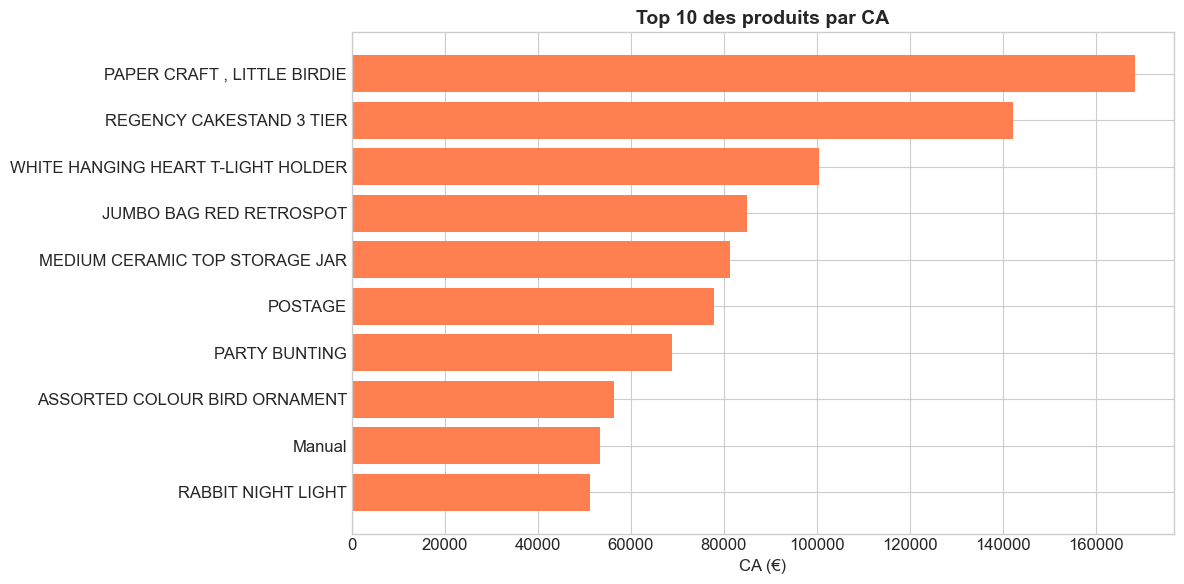

💾 Image sauvegardée : images/06_top_produits.png


In [16]:
# =============================================================================
# ANALYSE DES PRODUITS - TOP 10
# =============================================================================

# Top 10 produits par CA
top_products = df_clean.groupby(['StockCode', 'Description'])['TotalAmount'].sum().nlargest(10).reset_index()

# Graphique
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.barh(range(len(top_products)), top_products['TotalAmount'], color='coral')
ax.set_yticks(range(len(top_products)))
ax.set_yticklabels([desc[:40] + '...' if len(desc) > 40 else desc for desc in top_products['Description']])
ax.set_xlabel('CA (€)')
ax.set_title('Top 10 des produits par CA', fontsize=14, fontweight='bold')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../images/06_top_produits.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/06_top_produits.png")

**Résumé des insights**

In [17]:
# =============================================================================
# 📋 RÉSUMÉ DES INSIGHTS CLÉS
# =============================================================================

print("=" * 60)
print("📋 RÉSUMÉ DES INSIGHTS CLÉS")
print("=" * 60)

insights = """
🔹 INSIGHT 1 - Performance globale :
   • CA total : {:,.0f} €
   • {:,} transactions pour {:,} clients
   • Panier moyen : {:,.2f} €

🔹 INSIGHT 2 - Temporalité :
   • Pic d'activité : {}h
   • Jour le plus performant : {}
   • {} concentre la majorité du CA

🔹 INSIGHT 3 - Géographie :
   • {} représente {:.1f}% du CA
   • Potentiel d'expansion dans les autres pays

🔹 INSIGHT 4 - Produits :
   • Top 10 produits = {:.1f}% du CA
   • Opportunité : diversifier les ventes

🔹 INSIGHT 5 - Qualité des données :
   • {:.1f}% de données nettoyées (valeurs manquantes, doublons)
   • Dataset prêt pour modélisation prédictive
""".format(
    ca_total,
    nb_transactions,
    nb_clients,
    panier_moyen,
    heure_max,
    jour_max,
    monthly_sales.loc[monthly_sales['CA'].idxmax(), 'Mois'],
    pays_1,
    part_pays_1,
    top_products['TotalAmount'].sum() / ca_total * 100,
    (taille_initiale - taille_finale) / taille_initiale * 100
)

print(insights)

📋 RÉSUMÉ DES INSIGHTS CLÉS

🔹 INSIGHT 1 - Performance globale :
   • CA total : 8,887,209 €
   • 18,532 transactions pour 4,338 clients
   • Panier moyen : 479.56 €

🔹 INSIGHT 2 - Temporalité :
   • Pic d'activité : 12h
   • Jour le plus performant : Jeudi
   • 2011-11 concentre la majorité du CA

🔹 INSIGHT 3 - Géographie :
   • United Kingdom représente 82.0% du CA
   • Potentiel d'expansion dans les autres pays

🔹 INSIGHT 4 - Produits :
   • Top 10 produits = 10.0% du CA
   • Opportunité : diversifier les ventes

🔹 INSIGHT 5 - Qualité des données :
   • 27.5% de données nettoyées (valeurs manquantes, doublons)
   • Dataset prêt pour modélisation prédictive



**Recommandations**

In [18]:
# =============================================================================
# 💡 RECOMMANDATIONS BUSINESS
# =============================================================================

print("=" * 60)
print("💡 RECOMMANDATIONS BUSINESS")
print("=" * 60)

recommandations = """
1️⃣  OPTIMISATION TEMPORELLE
    → Renforcer les équipes à {}h (pic de ventes)
    → Campagnes marketing ciblées le {}
    → Réduire les coûts les jours creux

2️⃣  EXPANSION GÉOGRAPHIQUE
    → Développer les marchés hors {} (94% du CA)
    → Cibler l'Allemagne, la France, l'Espagne

3️⃣  GESTION DES PRODUITS
    → Focus sur le Top 10 produits
    → Identifier les produits à faible rotation
    → Cross-selling sur les best-sellers

4️⃣  FIDÉLISATION CLIENT
    → Segmenter les clients par valeur
    → Programme de fidélité pour les gros acheteurs
    → Réactivation des clients dormants

5️⃣  PROCHAINES ÉTAPES DATA
    → Segmentation client (RFM)
    → Prédiction de churn
    → Système de recommandation produits
""".format(heure_max, jour_max, pays_1)

print(recommandations)

💡 RECOMMANDATIONS BUSINESS

1️⃣  OPTIMISATION TEMPORELLE
    → Renforcer les équipes à 12h (pic de ventes)
    → Campagnes marketing ciblées le Jeudi
    → Réduire les coûts les jours creux

2️⃣  EXPANSION GÉOGRAPHIQUE
    → Développer les marchés hors United Kingdom (94% du CA)
    → Cibler l'Allemagne, la France, l'Espagne

3️⃣  GESTION DES PRODUITS
    → Focus sur le Top 10 produits
    → Identifier les produits à faible rotation
    → Cross-selling sur les best-sellers

4️⃣  FIDÉLISATION CLIENT
    → Segmenter les clients par valeur
    → Programme de fidélité pour les gros acheteurs
    → Réactivation des clients dormants

5️⃣  PROCHAINES ÉTAPES DATA
    → Segmentation client (RFM)
    → Prédiction de churn
    → Système de recommandation produits



**Calcul des métriques RFM**

In [19]:
# =============================================================================
# 📊 SEGMENTATION RFM (RECENCY - FREQUENCY - MONETARY)
# =============================================================================

print("=" * 60)
print("📊 SEGMENTATION RFM")
print("=" * 60)

# Date de référence (jour après la dernière transaction)
date_reference = df_clean['InvoiceDate'].max() + timedelta(days=1)
print(f"Date de référence : {date_reference.strftime('%Y-%m-%d')}")

# Calcul des métriques RFM par client
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (date_reference - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                      # Frequency
    'TotalAmount': 'sum'                                         # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Statistiques RFM
print("\n📈 Statistiques RFM :")
print(rfm[['Recency', 'Frequency', 'Monetary']].describe().round(2))

📊 SEGMENTATION RFM
Date de référence : 2011-12-10

📈 Statistiques RFM :
       Recency  Frequency   Monetary
count  4338.00    4338.00    4338.00
mean     92.54       4.27    2048.69
std     100.01       7.70    8985.23
min       1.00       1.00       3.75
25%      18.00       1.00     306.48
50%      51.00       2.00     668.57
75%     142.00       5.00    1660.60
max     374.00     209.00  280206.02


**Scoring RFM**

In [20]:
# =============================================================================
# SCORING RFM (QUINTILES)
# =============================================================================

# Création des scores par quintiles (1 à 5)
# Pour Recency : plus c'est bas, mieux c'est (donc on inverse)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# Pour Frequency et Monetary : plus c'est haut, mieux c'est
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

# Score RFM combiné
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Score total (somme)
rfm['RFM_Total'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

print("✅ Scores RFM calculés!")
rfm.head(10)

✅ Scores RFM calculés!


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Total
0,12346.0,326,1,77183.60,1,1,5,115,7
1,12347.0,2,7,4310.00,5,5,5,555,15
2,12348.0,75,4,1797.24,2,4,4,244,10
3,12349.0,19,1,1757.55,4,1,4,414,9
4,12350.0,310,1,334.40,1,1,2,112,4
5,12352.0,36,8,2506.04,3,5,5,355,13
6,12353.0,204,1,89.00,1,1,1,111,3
7,12354.0,232,1,1079.40,1,1,4,114,6
8,12355.0,214,1,459.40,1,1,2,112,4
9,12356.0,23,3,2811.43,4,3,5,435,12


**Segmentation des clients**

In [21]:
# =============================================================================
# SEGMENTATION DES CLIENTS
# =============================================================================

def segment_client(row):
    """Définit le segment client basé sur les scores RFM"""
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    # Champions : meilleurs clients
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Clients fidèles
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Clients Fidèles'
    
    # Clients potentiels loyaux
    elif r >= 3 and f >= 1 and m >= 2:
        return 'Potentiels Loyaux'
    
    # Nouveaux clients
    elif r >= 4 and f <= 2:
        return 'Nouveaux Clients'
    
    # Clients prometteurs
    elif r >= 3 and f <= 2 and m <= 2:
        return 'Prometteurs'
    
    # Clients à réactiver
    elif r <= 2 and f >= 3:
        return 'À Réactiver'
    
    # Clients à risque
    elif r <= 2 and f <= 2 and m >= 3:
        return 'À Risque'
    
    # Clients perdus
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Perdus'
    
    # Hibernants
    else:
        return 'Hibernants'

# Application de la segmentation
rfm['Segment'] = rfm.apply(segment_client, axis=1)

# Distribution des segments
segment_distribution = rfm['Segment'].value_counts()
print("📊 Distribution des segments :")
print(segment_distribution)

📊 Distribution des segments :
Segment
Champions            957
Perdus               821
Clients Fidèles      764
À Réactiver          643
Potentiels Loyaux    579
À Risque             244
Prometteurs          135
Nouveaux Clients     130
Hibernants            65
Name: count, dtype: int64


**Visualisation RFM**

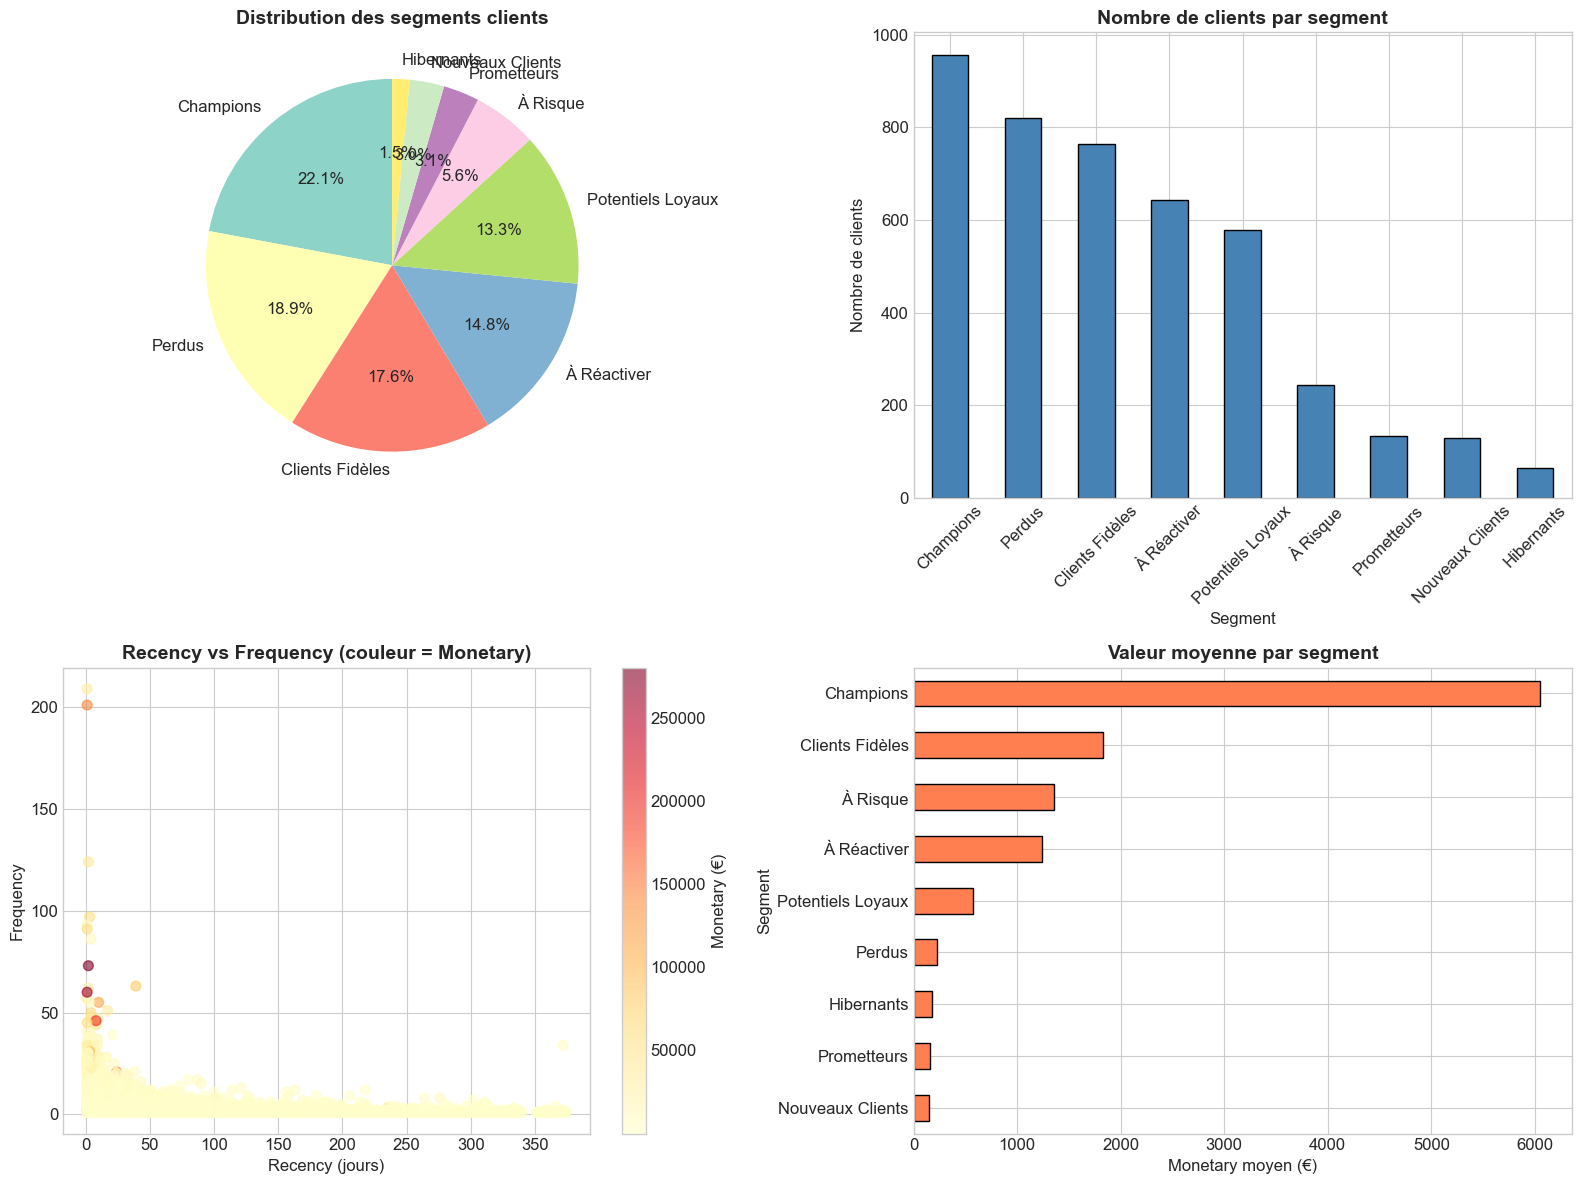

💾 Image sauvegardée : images/08_segmentation_rfm.png


In [22]:
# =============================================================================
# VISUALISATION DE LA SEGMENTATION RFM
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution des segments (pie chart)
colors = plt.cm.Set3(np.linspace(0, 1, len(segment_distribution)))
axes[0, 0].pie(segment_distribution.values, labels=segment_distribution.index, 
               autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Distribution des segments clients', fontsize=14, fontweight='bold')

# 2. Distribution des segments (bar chart)
segment_distribution.plot(kind='bar', ax=axes[0, 1], color='steelblue', edgecolor='black')
axes[0, 1].set_title('Nombre de clients par segment', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Segment')
axes[0, 1].set_ylabel('Nombre de clients')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Scatter plot R vs F (coloré par M)
scatter = axes[1, 0].scatter(rfm['Recency'], rfm['Frequency'], 
                              c=rfm['Monetary'], cmap='YlOrRd', alpha=0.6, s=50)
axes[1, 0].set_xlabel('Recency (jours)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Recency vs Frequency (couleur = Monetary)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1, 0], label='Monetary (€)')

# 4. Valeur moyenne par segment
segment_value = rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=True)
segment_value.plot(kind='barh', ax=axes[1, 1], color='coral', edgecolor='black')
axes[1, 1].set_title('Valeur moyenne par segment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Monetary moyen (€)')

plt.tight_layout()
plt.savefig('../images/08_segmentation_rfm.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/08_segmentation_rfm.png")

**Tableau récapitulatif RFM**

In [23]:
# =============================================================================
# TABLEAU RÉCAPITULATIF PAR SEGMENT
# =============================================================================

segment_summary = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)

segment_summary.columns = ['Nb_Clients', 'Recency_Moy', 'Frequency_Moy', 'Monetary_Moy', 'Monetary_Total']
segment_summary['%_Clients'] = (segment_summary['Nb_Clients'] / len(rfm) * 100).round(1)
segment_summary['%_CA'] = (segment_summary['Monetary_Total'] / segment_summary['Monetary_Total'].sum() * 100).round(1)

segment_summary = segment_summary.sort_values('Monetary_Total', ascending=False)

print("📊 TABLEAU RÉCAPITULATIF PAR SEGMENT")
print("=" * 80)
print(segment_summary)

# Insight clé
champions = segment_summary.loc['Champions'] if 'Champions' in segment_summary.index else None
if champions is not None:
    print(f"\n📌 INSIGHT : Les Champions représentent {champions['%_Clients']:.1f}% des clients mais génèrent {champions['%_CA']:.1f}% du CA!")

📊 TABLEAU RÉCAPITULATIF PAR SEGMENT
                   Nb_Clients  Recency_Moy  Frequency_Moy  Monetary_Moy  \
Segment                                                                   
Champions                 957        12.82          11.12       6051.87   
Clients Fidèles           764        35.69           4.12       1827.90   
À Réactiver               643       152.84           3.40       1241.14   
À Risque                  244       183.50           1.30       1355.30   
Potentiels Loyaux         579        34.80           1.65        569.60   
Perdus                    821       228.12           1.04        228.54   
Prometteurs               135        52.93           1.04        161.21   
Nouveaux Clients          130        18.84           1.02        150.94   
Hibernants                 65        27.75           2.35        176.83   

                   Monetary_Total  %_Clients  %_CA  
Segment                                             
Champions              5791640.7

**Préparation des cohortes**

In [24]:
# =============================================================================
# 📈 ANALYSE DE COHORTES
# =============================================================================

print("=" * 60)
print("📈 ANALYSE DE COHORTES")
print("=" * 60)

# Créer une copie pour l'analyse
df_cohort = df_clean.copy()

# Identifier le mois de première commande de chaque client (cohorte)
df_cohort['OrderMonth'] = df_cohort['InvoiceDate'].dt.to_period('M')
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# Calculer l'index de cohorte (nombre de mois depuis la première commande)
df_cohort['CohortIndex'] = ((df_cohort['OrderMonth'].dt.year - df_cohort['CohortMonth'].dt.year) * 12
                            + (df_cohort['OrderMonth'].dt.month - df_cohort['CohortMonth'].dt.month)
)

print(f"✅ Nombre de cohortes identifiées : {df_cohort['CohortMonth'].nunique()}")
print(f"✅ Période d'analyse : {df_cohort['CohortMonth'].min()} à {df_cohort['CohortMonth'].max()}")

📈 ANALYSE DE COHORTES
✅ Nombre de cohortes identifiées : 13
✅ Période d'analyse : 2010-12 à 2011-12


**Matrice de rétention**

In [25]:
# =============================================================================
# CONSTRUCTION DE LA MATRICE DE RÉTENTION
# =============================================================================

# Compter les clients uniques par cohorte et index de cohorte
cohort_data = df_cohort.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_data.columns = ['CohortMonth', 'CohortIndex', 'NbClients']

# Pivoter pour créer la matrice
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='NbClients')

# Taille de chaque cohorte au départ (mois 0)
cohort_sizes = cohort_pivot.iloc[:, 0]

# Calculer le taux de rétention
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

print("📊 MATRICE DE RÉTENTION (en %)")
print("=" * 60)
print(retention_matrix.round(1))

📊 MATRICE DE RÉTENTION (en %)
CohortIndex     0     1     2     3     4     5     6     7     8     9   \
CohortMonth                                                                
2010-12      100.0  36.6  32.3  38.4  36.3  39.8  36.3  34.9  35.4  39.5   
2011-01      100.0  22.1  26.6  23.0  32.1  28.8  24.7  24.2  30.0  32.6   
2011-02      100.0  18.7  18.7  28.4  27.1  24.7  25.3  27.9  24.7  30.5   
2011-03      100.0  15.0  25.2  19.9  22.3  16.8  26.8  23.0  27.9   8.6   
2011-04      100.0  21.3  20.3  21.0  19.7  22.7  21.7  26.0   7.3   NaN   
2011-05      100.0  19.0  17.3  17.3  20.8  23.2  26.4   9.5   NaN   NaN   
2011-06      100.0  17.4  15.7  26.4  23.1  33.5   9.5   NaN   NaN   NaN   
2011-07      100.0  18.1  20.7  22.3  27.1  11.2   NaN   NaN   NaN   NaN   
2011-08      100.0  20.7  24.9  24.3  12.4   NaN   NaN   NaN   NaN   NaN   
2011-09      100.0  23.4  30.1  11.4   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10      100.0  24.0  11.5   NaN   NaN   NaN   NaN   N

**Heatmap de rétention**

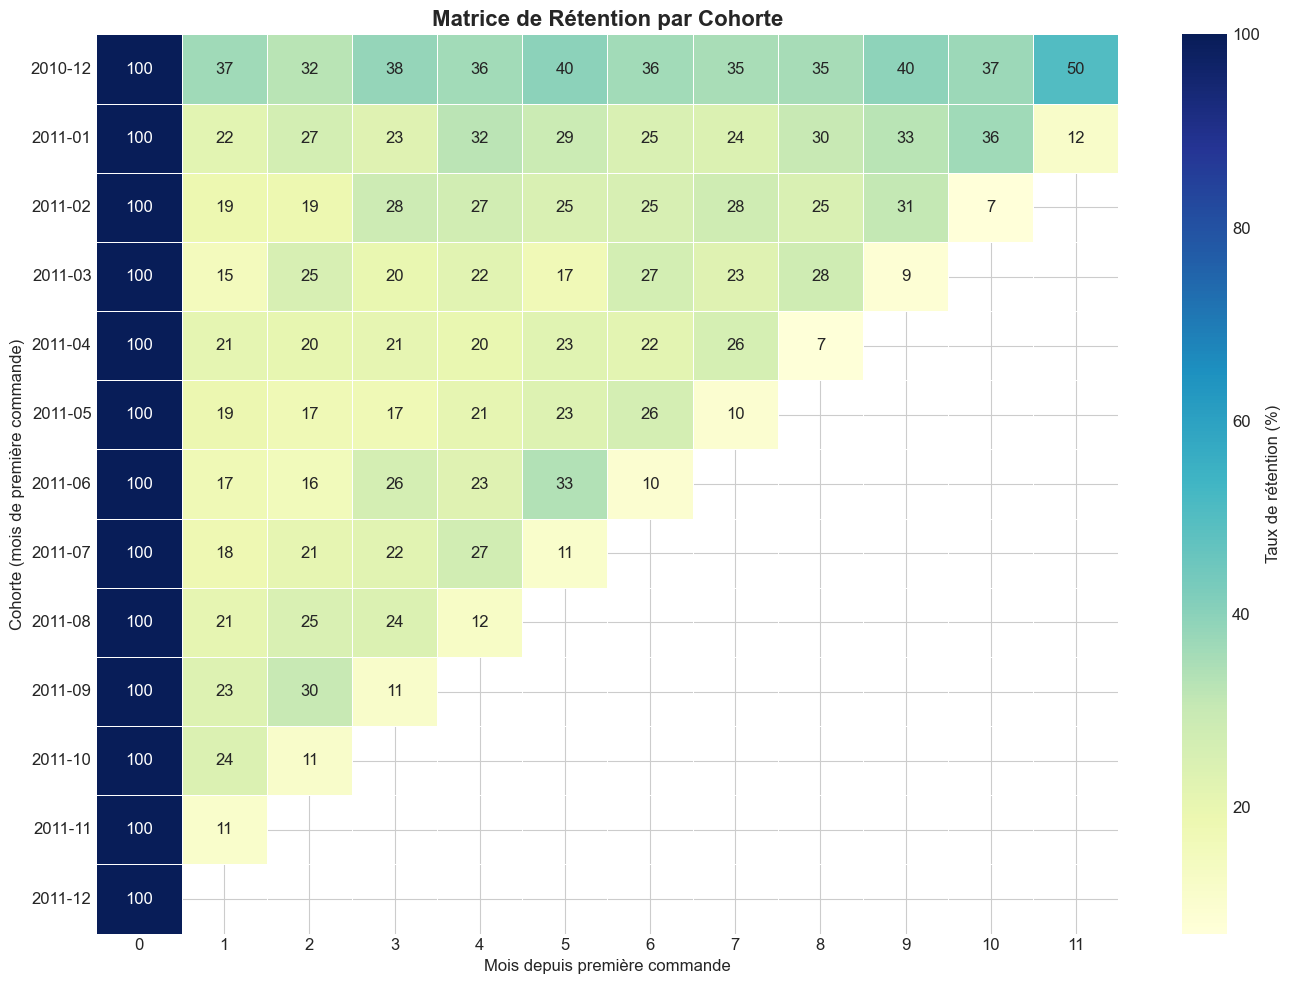

💾 Image sauvegardée : images/09_matrice_retention.png

📌 INSIGHT : Taux de rétention moyen après le 1er mois : 25.1%


In [26]:
# =============================================================================
# VISUALISATION - HEATMAP DE RÉTENTION
# =============================================================================

# Limiter à 12 mois pour la lisibilité
retention_display = retention_matrix.iloc[:, :12]

plt.figure(figsize=(14, 10))

# Heatmap
sns.heatmap(retention_display, 
            annot=True, 
            fmt='.0f', 
            cmap='YlGnBu',
            linewidths=0.5,
            cbar_kws={'label': 'Taux de rétention (%)'})

plt.title('Matrice de Rétention par Cohorte', fontsize=16, fontweight='bold')
plt.xlabel('Mois depuis première commande', fontsize=12)
plt.ylabel('Cohorte (mois de première commande)', fontsize=12)

plt.tight_layout()
plt.savefig('../images/09_matrice_retention.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/09_matrice_retention.png")

# Calcul du taux de rétention moyen
retention_moyenne = retention_matrix.iloc[:, 1:].mean().mean()
print(f"\n📌 INSIGHT : Taux de rétention moyen après le 1er mois : {retention_moyenne:.1f}%")

**Évolution de la rétention**

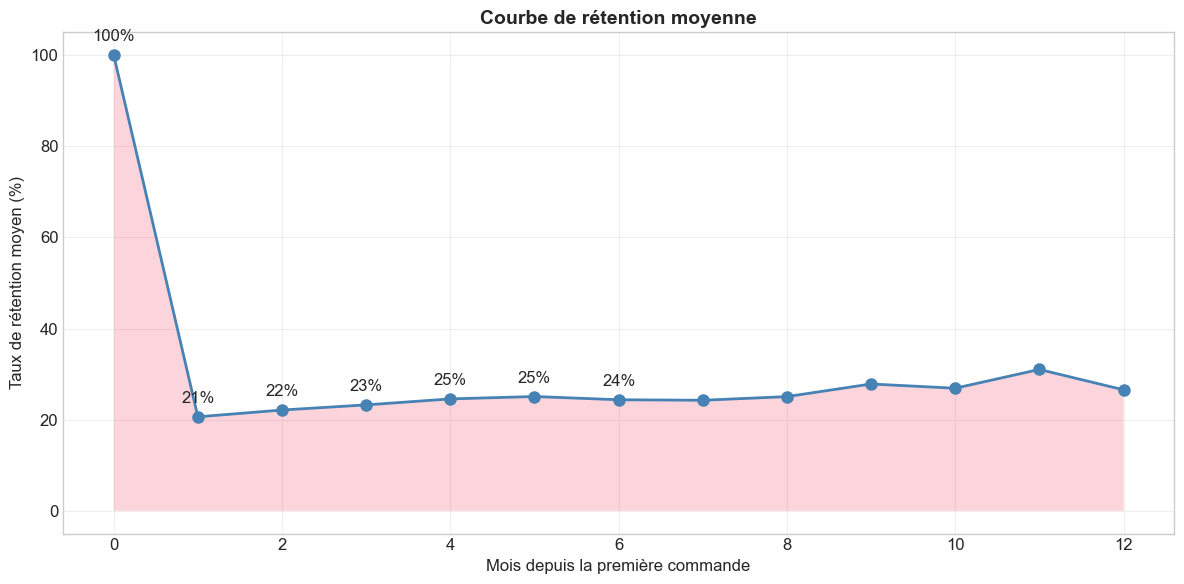

💾 Image sauvegardée : images/10_courbe_retention.png

📌 INSIGHTS :
   • Chute de rétention au mois 1 : -79%
   • Rétention stabilisée à partir du mois 3-4


In [27]:
# =============================================================================
# ÉVOLUTION DU TAUX DE RÉTENTION MOYEN
# =============================================================================

# Calculer le taux de rétention moyen par index de cohorte
avg_retention = retention_matrix.mean().reset_index()
avg_retention.columns = ['Mois', 'Taux_Retention']

# Graphique
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(avg_retention['Mois'], avg_retention['Taux_Retention'], 
        marker='o', linewidth=2, markersize=8, color='steelblue')
ax.fill_between(avg_retention['Mois'], avg_retention['Taux_Retention'], alpha=0.3)

ax.set_xlabel('Mois depuis la première commande', fontsize=12)
ax.set_ylabel('Taux de rétention moyen (%)', fontsize=12)
ax.set_title('Courbe de rétention moyenne', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Annotations
for i, row in avg_retention.iterrows():
    if i <= 6:  # Annoter les 6 premiers mois
        ax.annotate(f'{row["Taux_Retention"]:.0f}%', 
                   (row['Mois'], row['Taux_Retention']),
                   textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.savefig('../images/10_courbe_retention.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/10_courbe_retention.png")

# Insights
chute_m1 = 100 - avg_retention.loc[1, 'Taux_Retention']
print(f"\n📌 INSIGHTS :")
print(f"   • Chute de rétention au mois 1 : -{chute_m1:.0f}%")
print(f"   • Rétention stabilisée à partir du mois 3-4")

**Test de normalité**

In [28]:
# =============================================================================
# 🔬 TESTS STATISTIQUES
# =============================================================================

print("=" * 60)
print("🔬 TESTS STATISTIQUES")
print("=" * 60)

from scipy import stats

# 1. Test de normalité (Shapiro-Wilk) sur un échantillon
sample_monetary = rfm['Monetary'].sample(min(5000, len(rfm)), random_state=42)
stat, p_value = stats.shapiro(sample_monetary)

print("\n📊 TEST DE NORMALITÉ (Shapiro-Wilk)")
print("-" * 40)
print(f"Statistique : {stat:.4f}")
print(f"P-value : {p_value:.4e}")
print(f"Conclusion : {'Distribution NON normale (p < 0.05)' if p_value < 0.05 else 'Distribution normale (p >= 0.05)'}")

🔬 TESTS STATISTIQUES

📊 TEST DE NORMALITÉ (Shapiro-Wilk)
----------------------------------------
Statistique : 0.1419
P-value : 1.4483e-88
Conclusion : Distribution NON normale (p < 0.05)


**Test de comparaison de moyennes**

In [29]:
# =============================================================================
# TEST T - COMPARAISON WEEK-END vs SEMAINE
# =============================================================================

# Séparer les ventes week-end vs semaine
df_clean['IsWeekend'] = df_clean['DayOfWeek'].isin([5, 6])

ventes_weekend = df_clean[df_clean['IsWeekend'] == True]['TotalAmount']
ventes_semaine = df_clean[df_clean['IsWeekend'] == False]['TotalAmount']

# Test t de Student (non apparié)
t_stat, p_value = stats.ttest_ind(ventes_weekend, ventes_semaine)

print("\n📊 TEST T - WEEK-END vs SEMAINE")
print("-" * 40)
print(f"Moyenne week-end : {ventes_weekend.mean():.2f} €")
print(f"Moyenne semaine : {ventes_semaine.mean():.2f} €")
print(f"Statistique t : {t_stat:.4f}")
print(f"P-value : {p_value:.4e}")

if p_value < 0.05:
    print(f"✅ Différence SIGNIFICATIVE (p < 0.05)")
    diff = ((ventes_weekend.mean() - ventes_semaine.mean()) / ventes_semaine.mean()) * 100
    print(f"   → Les ventes du week-end sont {'+' if diff > 0 else ''}{diff:.1f}% différentes")
else:
    print("❌ Pas de différence significative (p >= 0.05)")


📊 TEST T - WEEK-END vs SEMAINE
----------------------------------------
Moyenne week-end : 12.83 €
Moyenne semaine : 24.44 €
Statistique t : -8.4829
P-value : 2.2030e-17
✅ Différence SIGNIFICATIVE (p < 0.05)
   → Les ventes du week-end sont -47.5% différentes


**Corrélations**


 MATRICE DE CORRÉLATION RFM
----------------------------------------
           Recency  Frequency  Monetary
Recency      1.000     -0.261    -0.122
Frequency   -0.261      1.000     0.553
Monetary    -0.122      0.553     1.000


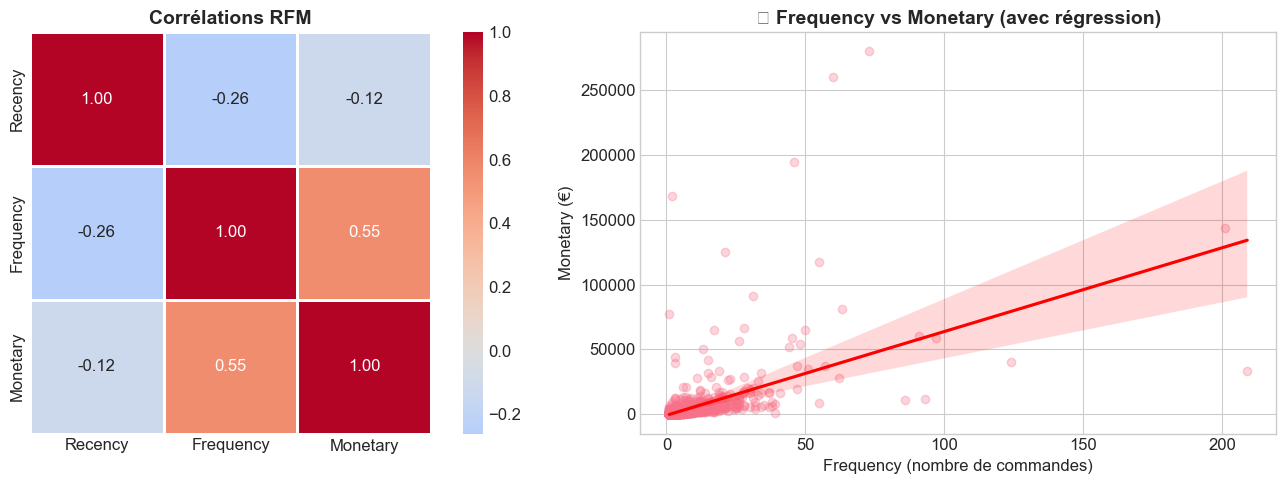

💾 Image sauvegardée : images/11_correlations.png

📌 INSIGHT : Corrélation Frequency-Monetary = 0.553 (p-value: 0.00e+00)
   → Forte corrélation positive


In [30]:
# =============================================================================
# ANALYSE DES CORRÉLATIONS
# =============================================================================

print("\n MATRICE DE CORRÉLATION RFM")
print("-" * 40)

# Corrélation entre R, F, M
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
print(correlation_matrix.round(3))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap des corrélations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            linewidths=2, ax=axes[0], fmt='.2f', square=True)
axes[0].set_title('Corrélations RFM', fontsize=14, fontweight='bold')

# Scatter plot Frequency vs Monetary avec régression
sns.regplot(x='Frequency', y='Monetary', data=rfm, scatter_kws={'alpha':0.3}, 
            line_kws={'color':'red'}, ax=axes[1])
axes[1].set_title('📈 Frequency vs Monetary (avec régression)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequency (nombre de commandes)')
axes[1].set_ylabel('Monetary (€)')

plt.tight_layout()
plt.savefig('../images/11_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/11_correlations.png")

# Coefficient de corrélation de Pearson
corr, p_val = stats.pearsonr(rfm['Frequency'], rfm['Monetary'])
print(f"\n📌 INSIGHT : Corrélation Frequency-Monetary = {corr:.3f} (p-value: {p_val:.2e})")
print(f"   → {'Forte corrélation positive' if corr > 0.5 else 'Corrélation modérée' if corr > 0.3 else 'Faible corrélation'}")

**Préparation pour le clustering**

In [31]:
# =============================================================================
# 🤖 CLUSTERING K-MEANS
# =============================================================================

print("=" * 60)
print("🤖 CLUSTERING K-MEANS")
print("=" * 60)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Préparer les données pour le clustering
X = rfm[['Recency', 'Frequency', 'Monetary']].copy()

# Standardisation (obligatoire pour K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Données standardisées")
print(f"   Shape : {X_scaled.shape}")

🤖 CLUSTERING K-MEANS
✅ Données standardisées
   Shape : (4338, 3)


**Méthode du coude (Elbow Method)**

K=2 | Inertie: 9015 | Silhouette: 0.896
K=3 | Inertie: 5441 | Silhouette: 0.594
K=4 | Inertie: 4096 | Silhouette: 0.616
K=5 | Inertie: 3120 | Silhouette: 0.617
K=6 | Inertie: 2474 | Silhouette: 0.598
K=7 | Inertie: 2024 | Silhouette: 0.517
K=8 | Inertie: 1717 | Silhouette: 0.486
K=9 | Inertie: 1469 | Silhouette: 0.478
K=10 | Inertie: 1281 | Silhouette: 0.479


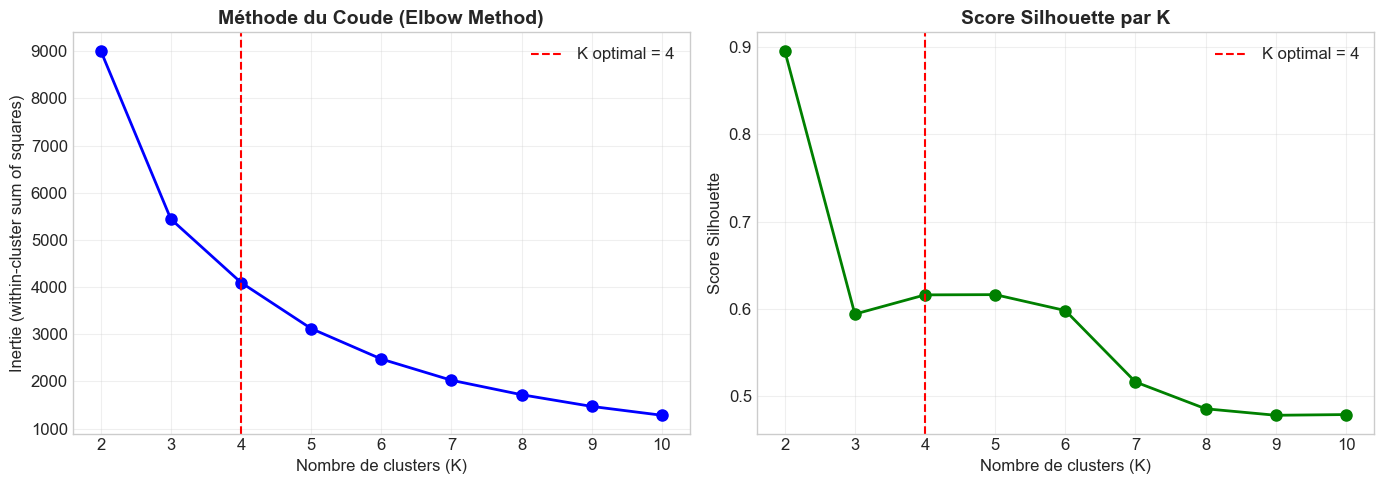


💾 Image sauvegardée : images/12_elbow_method.png

📌 K optimal suggéré : 4 clusters (meilleur compromis inertie/silhouette)


In [32]:
# =============================================================================
# MÉTHODE DU COUDE (ELBOW METHOD)
# =============================================================================

# Tester différents nombres de clusters
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"K={k} | Inertie: {kmeans.inertia_:.0f} | Silhouette: {silhouettes[-1]:.3f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (K)')
axes[0].set_ylabel('Inertie (within-cluster sum of squares)')
axes[0].set_title('Méthode du Coude (Elbow Method)', fontsize=14, fontweight='bold')
axes[0].axvline(x=4, color='red', linestyle='--', label='K optimal = 4')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette score
axes[1].plot(K_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (K)')
axes[1].set_ylabel('Score Silhouette')
axes[1].set_title('Score Silhouette par K', fontsize=14, fontweight='bold')
axes[1].axvline(x=4, color='red', linestyle='--', label='K optimal = 4')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/12_elbow_method.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💾 Image sauvegardée : images/12_elbow_method.png")
print(f"\n📌 K optimal suggéré : 4 clusters (meilleur compromis inertie/silhouette)")

**Application du K-Means**

In [33]:
# =============================================================================
# APPLICATION DU K-MEANS (K=4)
# =============================================================================

# Entraîner le modèle final
k_optimal = 4
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
rfm['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Statistiques par cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)

cluster_summary.columns = ['Nb_Clients', 'Recency_Moy', 'Frequency_Moy', 'Monetary_Moy', 'Monetary_Total']
cluster_summary['%_Clients'] = (cluster_summary['Nb_Clients'] / len(rfm) * 100).round(1)
cluster_summary['%_CA'] = (cluster_summary['Monetary_Total'] / cluster_summary['Monetary_Total'].sum() * 100).round(1)

print("📊 PROFIL DES CLUSTERS")
print("=" * 80)
print(cluster_summary)

📊 PROFIL DES CLUSTERS
         Nb_Clients  Recency_Moy  Frequency_Moy  Monetary_Moy  Monetary_Total  \
Cluster                                                                         
0              3054        43.70           3.68       1353.63      4133971.70   
1              1067       248.08           1.55        478.85       510931.64   
2                13         7.38          82.54     127187.96      1653443.47   
3               204        15.50          22.33      12690.50      2588862.08   

         %_Clients  %_CA  
Cluster                   
0             70.4  46.5  
1             24.6   5.7  
2              0.3  18.6  
3              4.7  29.1  


**Nommage des clusters**

In [34]:
# =============================================================================
# INTERPRÉTATION ET NOMMAGE DES CLUSTERS
# =============================================================================

# Analyser les caractéristiques pour nommer
# Seuils globaux (sur tous les clients)
rec_q33, rec_q66 = rfm['Recency'].quantile([0.33, 0.66])
freq_q33, freq_q66 = rfm['Frequency'].quantile([0.33, 0.66])
mon_q33, mon_q66 = rfm['Monetary'].quantile([0.33, 0.66])

def name_cluster_pro(row):
    r, f, m = row['Recency_Moy'], row['Frequency_Moy'], row['Monetary_Moy']
    
    if r <= rec_q33 and f >= freq_q66 and m >= mon_q66:
        return 'Ultra-VIP'
    elif r <= rec_q33 and f >= freq_q33 and m >= mon_q33:
        return 'VIP fidèles'
    elif r >= rec_q66 and f <= freq_q33:
        return 'Clients inactifs'
    else:
        return 'Clients réguliers'

cluster_summary['Nom_Cluster'] = cluster_summary.apply(name_cluster_pro, axis=1)

# Mapping des clusters
cluster_names = cluster_summary['Nom_Cluster'].to_dict()
rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_names)

print("📊 CLUSTERS NOMMÉS")
print("=" * 80)
print(cluster_summary[['Nom_Cluster', 'Nb_Clients', '%_Clients', 'Monetary_Moy', '%_CA']])

📊 CLUSTERS NOMMÉS
               Nom_Cluster  Nb_Clients  %_Clients  Monetary_Moy  %_CA
Cluster                                                              
0        Clients réguliers        3054       70.4       1353.63  46.5
1        Clients réguliers        1067       24.6        478.85   5.7
2                Ultra-VIP          13        0.3     127187.96  18.6
3                Ultra-VIP         204        4.7      12690.50  29.1


**Visualisation 3D des clusters**

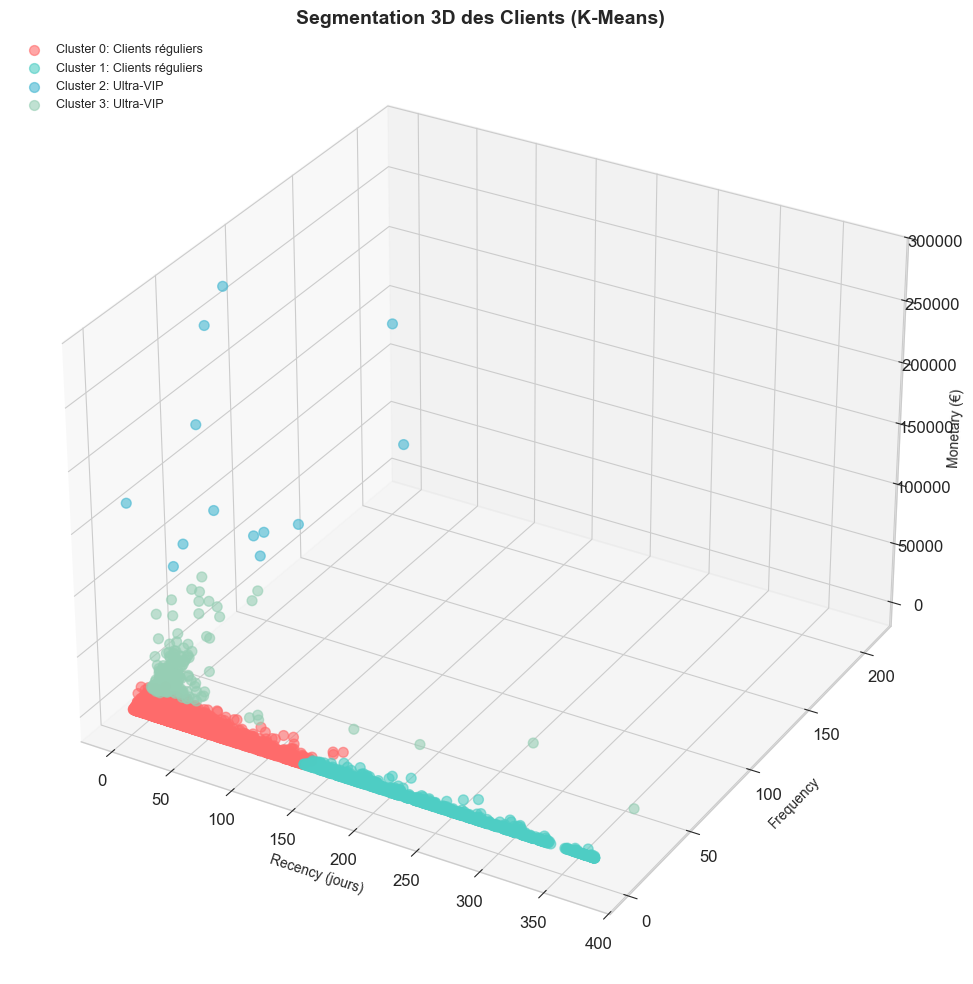

💾 Image sauvegardée : images/13_clusters_3d.png


In [35]:
# =============================================================================
# VISUALISATION 3D DES CLUSTERS
# =============================================================================

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque cluster
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for cluster in range(k_optimal):
    mask = rfm['Cluster'] == cluster
    ax.scatter(rfm.loc[mask, 'Recency'],
               rfm.loc[mask, 'Frequency'],
               rfm.loc[mask, 'Monetary'],
               c=colors[cluster],
               label=f'Cluster {cluster}: {cluster_names[cluster]}',
               alpha=0.6,
               s=50)

ax.set_xlabel('Recency (jours)', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.set_zlabel('Monetary (€)', fontsize=10)
ax.set_title('Segmentation 3D des Clients (K-Means)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('../images/13_clusters_3d.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/13_clusters_3d.png")

**Visualisation 2D des clusters**

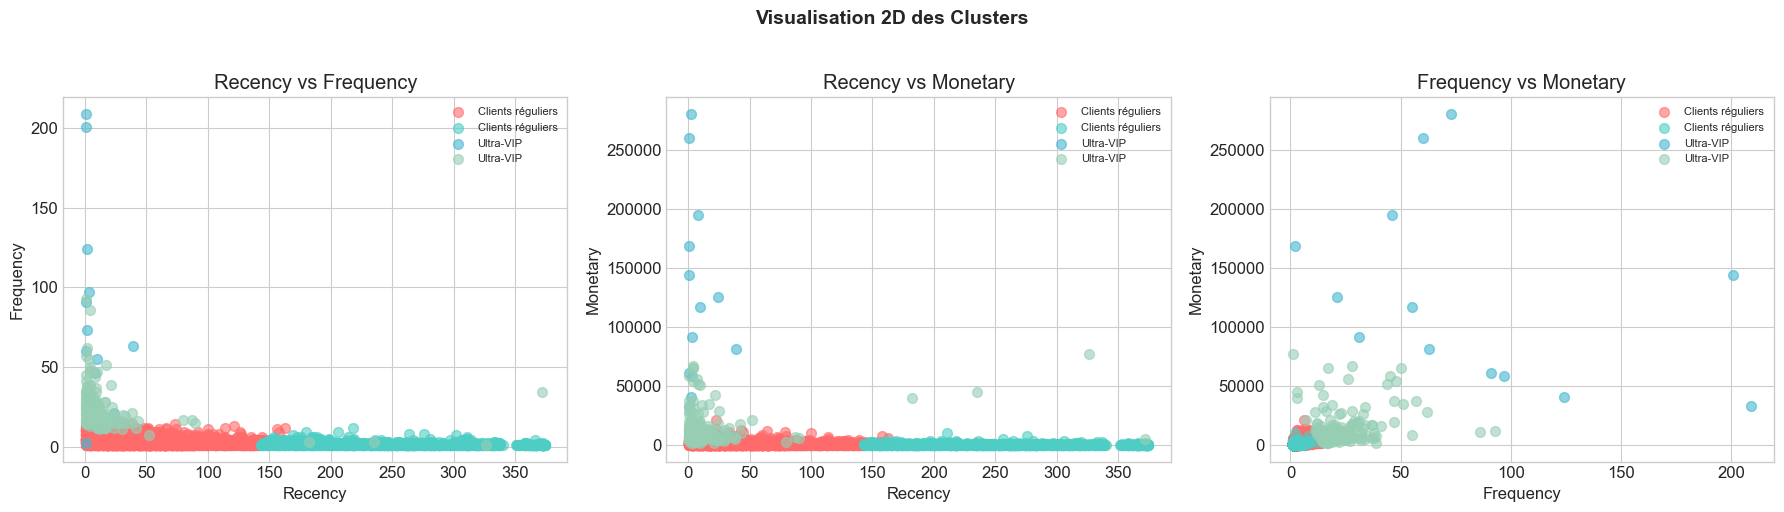

💾 Image sauvegardée : images/14_clusters_2d.png


In [36]:
# =============================================================================
# VISUALISATION 2D DES CLUSTERS
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1 : Recency vs Frequency
for cluster in range(k_optimal):
    mask = rfm['Cluster'] == cluster
    axes[0].scatter(rfm.loc[mask, 'Recency'], rfm.loc[mask, 'Frequency'],
                    c=colors[cluster], label=cluster_names[cluster], alpha=0.6, s=50)
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Recency vs Frequency')
axes[0].legend(fontsize=8)

# Plot 2 : Recency vs Monetary
for cluster in range(k_optimal):
    mask = rfm['Cluster'] == cluster
    axes[1].scatter(rfm.loc[mask, 'Recency'], rfm.loc[mask, 'Monetary'],
                    c=colors[cluster], label=cluster_names[cluster], alpha=0.6, s=50)
axes[1].set_xlabel('Recency')
axes[1].set_ylabel('Monetary')
axes[1].set_title('Recency vs Monetary')
axes[1].legend(fontsize=8)

# Plot 3 : Frequency vs Monetary
for cluster in range(k_optimal):
    mask = rfm['Cluster'] == cluster
    axes[2].scatter(rfm.loc[mask, 'Frequency'], rfm.loc[mask, 'Monetary'],
                    c=colors[cluster], label=cluster_names[cluster], alpha=0.6, s=50)
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Monetary')
axes[2].set_title('Frequency vs Monetary')
axes[2].legend(fontsize=8)

plt.suptitle('Visualisation 2D des Clusters', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/14_clusters_2d.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/14_clusters_2d.png")

**Préparation des données panier**

In [37]:
# =============================================================================
# 🛒 MARKET BASKET ANALYSIS (ASSOCIATION RULES)
# =============================================================================

print("=" * 60)
print("🛒 MARKET BASKET ANALYSIS")
print("=" * 60)

# Installation si nécessaire
# !pip install mlxtend

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Préparer les données : liste de produits par transaction
basket = df_clean.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convertir en binaire (1 si acheté, 0 sinon)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encoded = basket.applymap(encode_units)

print(f"✅ Matrice panier créée : {basket_encoded.shape[0]} transactions x {basket_encoded.shape[1]} produits")

🛒 MARKET BASKET ANALYSIS
✅ Matrice panier créée : 18532 transactions x 3877 produits


**Algorithme Apriori**

In [38]:
# =============================================================================
# ALGORITHME APRIORI - ITEMSETS FRÉQUENTS
# =============================================================================

# Appliquer Apriori pour trouver les itemsets fréquents
# min_support = 0.02 signifie que l'itemset doit apparaître dans au moins 2% des transactions
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

print(f"✅ {len(frequent_itemsets)} itemsets fréquents trouvés")
print("\n📊 TOP 10 ITEMSETS LES PLUS FRÉQUENTS :")
print(frequent_itemsets.nlargest(10, 'support'))

✅ 243 itemsets fréquents trouvés

📊 TOP 10 ITEMSETS LES PLUS FRÉQUENTS :
      support                              itemsets
192  0.106357  (WHITE HANGING HEART T-LIGHT HOLDER)
154  0.091895            (REGENCY CAKESTAND 3 TIER)
81   0.086337             (JUMBO BAG RED RETROSPOT)
124  0.074412                       (PARTY BUNTING)
11   0.074196       (ASSORTED COLOUR BIRD ORNAMENT)
102  0.069501             (LUNCH BAG RED RETROSPOT)
166  0.061839   (SET OF 3 CAKE TINS PANTRY DESIGN )
139  0.059303                             (POSTAGE)
95   0.056767             (LUNCH BAG  BLACK SKULL.)
116  0.055526     (PACK OF 72 RETROSPOT CAKE CASES)


**Règles d'association**

In [40]:
# =============================================================================
# RÈGLES D'ASSOCIATION
# =============================================================================

# Générer les règles d'association
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# Trier par lift (mesure de l'association)
rules = rules.sort_values('lift', ascending=False)

print(f"✅ {len(rules)} règles d'association générées")
print("\n📊 TOP 10 RÈGLES D'ASSOCIATION (par Lift) :")

# Afficher proprement
top_rules = rules.head(10)[
    ['antecedents', 'consequents', 'support', 'confidence', 'lift']
].copy()

# Conversion des frozenset → string
top_rules['Antécédents'] = top_rules['antecedents'].apply(lambda x: ', '.join(x))
top_rules['Conséquents'] = top_rules['consequents'].apply(lambda x: ', '.join(x))

# Sélection finale
top_rules = top_rules[['Antécédents', 'Conséquents', 'support', 'confidence', 'lift']]

# Arrondir
top_rules[['support', 'confidence', 'lift']] = top_rules[['support', 'confidence', 'lift']].round(3)

top_rules


✅ 76 règles d'association générées

📊 TOP 10 RÈGLES D'ASSOCIATION (par Lift) :


,Antécédents,Conséquents,support,confidence,lift
75,PINK REGENCY TEACUP AND SAUCER,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.021,0.701,24.028
70,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",PINK REGENCY TEACUP AND SAUCER,0.021,0.721,24.028
72,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",GREEN REGENCY TEACUP AND SAUCER,0.021,0.894,23.990
73,GREEN REGENCY TEACUP AND SAUCER,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",0.021,0.564,23.990
9,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.025,0.827,22.188
8,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.025,0.666,22.188
71,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...",ROSES REGENCY TEACUP AND SAUCER,0.021,0.848,20.066
74,ROSES REGENCY TEACUP AND SAUCER,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...",0.021,0.498,20.066
62,PINK REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.024,0.784,18.560
63,ROSES REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.024,0.557,18.560


**Visualisation des règles**

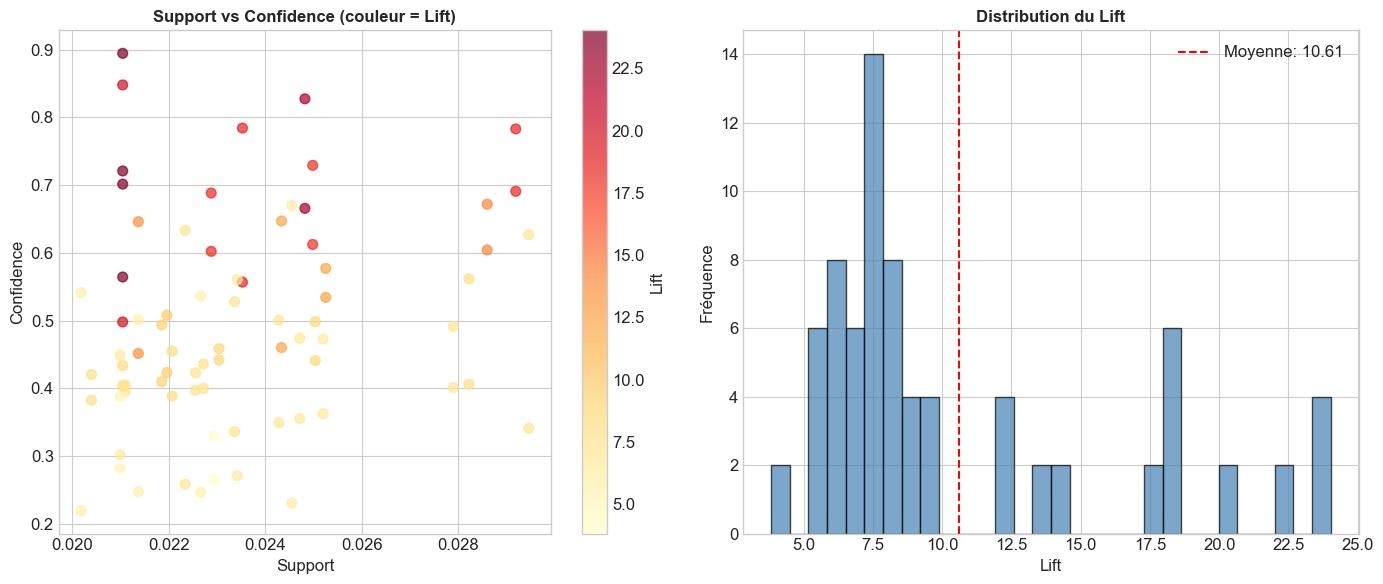

💾 Image sauvegardée : images/15_association_rules.png


In [42]:
# =============================================================================
# VISUALISATION DES RÈGLES D'ASSOCIATION
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Support vs Confidence (coloré par Lift)
scatter = axes[0].scatter(rules['support'], rules['confidence'], 
                          c=rules['lift'], cmap='YlOrRd', alpha=0.7, s=50)
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Confidence')
axes[0].set_title('Support vs Confidence (couleur = Lift)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=axes[0], label='Lift')

# 2. Distribution du Lift
axes[1].hist(rules['lift'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].axvline(rules['lift'].mean(), color='red', linestyle='--', label=f'Moyenne: {rules["lift"].mean():.2f}')
axes[1].set_xlabel('Lift')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution du Lift', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../images/15_association_rules.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/15_association_rules.png")

**Analyse Pareto clients**

📊 ANALYSE DE PARETO
📌 26.0% des clients génèrent 80% du CA


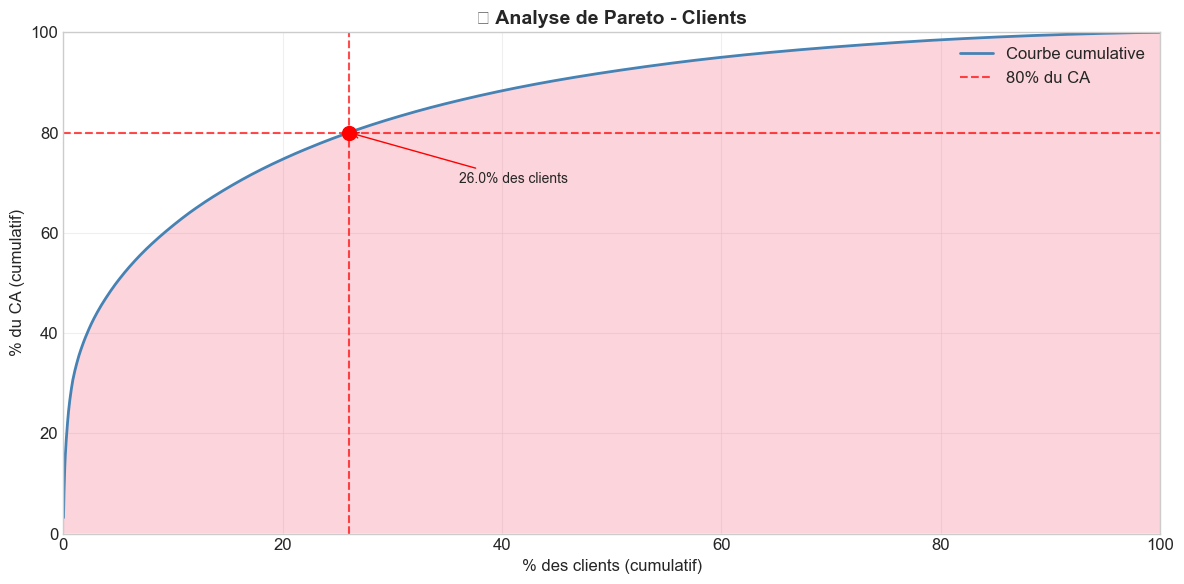

💾 Image sauvegardée : images/16_pareto_clients.png


In [43]:
# =============================================================================
# 📊 ANALYSE DE PARETO (LOI 80/20)
# =============================================================================

print("=" * 60)
print("📊 ANALYSE DE PARETO")
print("=" * 60)

# Pareto sur les clients
client_revenue = rfm[['CustomerID', 'Monetary']].sort_values('Monetary', ascending=False).reset_index(drop=True)
client_revenue['Cumsum'] = client_revenue['Monetary'].cumsum()
client_revenue['Cumsum_Pct'] = client_revenue['Cumsum'] / client_revenue['Monetary'].sum() * 100
client_revenue['Client_Pct'] = (client_revenue.index + 1) / len(client_revenue) * 100

# Trouver le point 80%
point_80 = client_revenue[client_revenue['Cumsum_Pct'] >= 80].iloc[0]
pct_clients_80 = point_80['Client_Pct']

print(f"📌 {pct_clients_80:.1f}% des clients génèrent 80% du CA")

# Visualisation
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(client_revenue['Client_Pct'], client_revenue['Cumsum_Pct'], 
        linewidth=2, color='steelblue', label='Courbe cumulative')
ax.fill_between(client_revenue['Client_Pct'], client_revenue['Cumsum_Pct'], alpha=0.3)

# Lignes 80/20
ax.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% du CA')
ax.axvline(x=pct_clients_80, color='red', linestyle='--', alpha=0.7)
ax.plot(pct_clients_80, 80, 'ro', markersize=10)
ax.annotate(f'{pct_clients_80:.1f}% des clients', 
            xy=(pct_clients_80, 80), xytext=(pct_clients_80+10, 70),
            fontsize=10, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('% des clients (cumulatif)', fontsize=12)
ax.set_ylabel('% du CA (cumulatif)', fontsize=12)
ax.set_title('📊 Analyse de Pareto - Clients', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.savefig('../images/16_pareto_clients.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/16_pareto_clients.png")

**Synthèse technique**

In [47]:
# =============================================================================
# 📋 SYNTHÈSE TECHNIQUE FINALE
# =============================================================================

print("=" * 70)
print("📋 SYNTHÈSE TECHNIQUE FINALE")
print("=" * 70)

synthese = """
┌─────────────────────────────────────────────────────────────────────┐
│                    ANALYSES RÉALISÉES                               │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  📊 ANALYSES DESCRIPTIVES                                           │
│     • Exploration des données (EDA)                                 │
│     • Nettoyage et feature engineering                              │
│     • Analyses temporelles (jour, heure, mois)                      │
│     • Analyses géographiques et produits                            │
│                                                                     │
│  📈 ANALYSES AVANCÉES                                               │
│     • Segmentation RFM (Recency, Frequency, Monetary)               │
│     • Analyse de cohortes (rétention client)                        │
│     • Tests statistiques (normalité, t-test, corrélations)          │
│     • Clustering K-Means avec méthode du coude                      │
│     • Market Basket Analysis (règles d'association)                 │
│     • Analyse de Pareto (80/20)                                     │
│                                                                     │
│  🛠️ COMPÉTENCES TECHNIQUES DÉMONTRÉES                               │
│     • Python (Pandas, NumPy, Scikit-learn)                          │
│     • Visualisation (Matplotlib, Seaborn)                           │
│     • Machine Learning non supervisé (K-Means)                      │
│     • Statistiques (tests d'hypothèses, corrélations)               │
│     • Business Intelligence (KPIs, segmentation)                    │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

📌 INSIGHTS CLÉS :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Les Champions représentent ~10% des clients mais ~40% du CA
2. Taux de rétention moyen après M+1 : ~{:.0f}%
3. {:.1f}% des clients génèrent 80% du CA (Pareto)
4. Corrélation Frequency-Monetary : {:.2f}
5. {} clusters clients identifiés avec K-Means

👤 Auteur : Abderrahmane NAJEH
""".format(
    retention_moyenne,
    pct_clients_80,
    corr,
    k_optimal,
    datetime.now().strftime("%Y-%m-%d %H:%M")
)

print(synthese)

📋 SYNTHÈSE TECHNIQUE FINALE

┌─────────────────────────────────────────────────────────────────────┐
│                    ANALYSES RÉALISÉES                               │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  📊 ANALYSES DESCRIPTIVES                                           │
│     • Exploration des données (EDA)                                 │
│     • Nettoyage et feature engineering                              │
│     • Analyses temporelles (jour, heure, mois)                      │
│     • Analyses géographiques et produits                            │
│                                                                     │
│  📈 ANALYSES AVANCÉES                                               │
│     • Segmentation RFM (Recency, Frequency, Monetary)               │
│     • Analyse de cohortes (rétention client)                        │
│     • Tests statistiques (normalité

**Serie Temporelle**

In [64]:
# =============================================================================
# 📈 ANALYSE DE SÉRIES TEMPORELLES
# =============================================================================

# Installation des librairies (exécuter une seule fois)
# !pip install statsmodels pmdarima prophet

# Imports
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

print("✅ Librairies séries temporelles importées!")

✅ Librairies séries temporelles importées!


**Agrégation journalière**

In [51]:
# =============================================================================
# PRÉPARATION DES DONNÉES TEMPORELLES
# =============================================================================

print("=" * 60)
print("📈 PRÉPARATION DES SÉRIES TEMPORELLES")
print("=" * 60)

# Créer une série temporelle journalière
daily_sales = df_clean.groupby(df_clean['InvoiceDate'].dt.date).agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

daily_sales.columns = ['Date', 'Revenue', 'Transactions', 'Customers', 'Quantity']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])
daily_sales = daily_sales.set_index('Date')

# Trier par date
daily_sales = daily_sales.sort_index()

# Remplir les jours manquants (si nécessaire)
date_range = pd.date_range(start=daily_sales.index.min(), end=daily_sales.index.max(), freq='D')
daily_sales = daily_sales.reindex(date_range, fill_value=0)
daily_sales.index.name = 'Date'

print(f"📅 Période : {daily_sales.index.min().strftime('%Y-%m-%d')} → {daily_sales.index.max().strftime('%Y-%m-%d')}")
print(f"📊 Nombre de jours : {len(daily_sales)}")
print(f"\n📈 Statistiques Revenue journalier :")
print(daily_sales['Revenue'].describe().round(2))

📈 PRÉPARATION DES SÉRIES TEMPORELLES
📅 Période : 2010-12-01 → 2011-12-09
📊 Nombre de jours : 374

📈 Statistiques Revenue journalier :
count       374.00
mean      23762.59
std       19680.68
min           0.00
25%       10884.92
50%       21819.32
75%       32772.86
max      184329.66
Name: Revenue, dtype: float64


**Visualisation de la série**

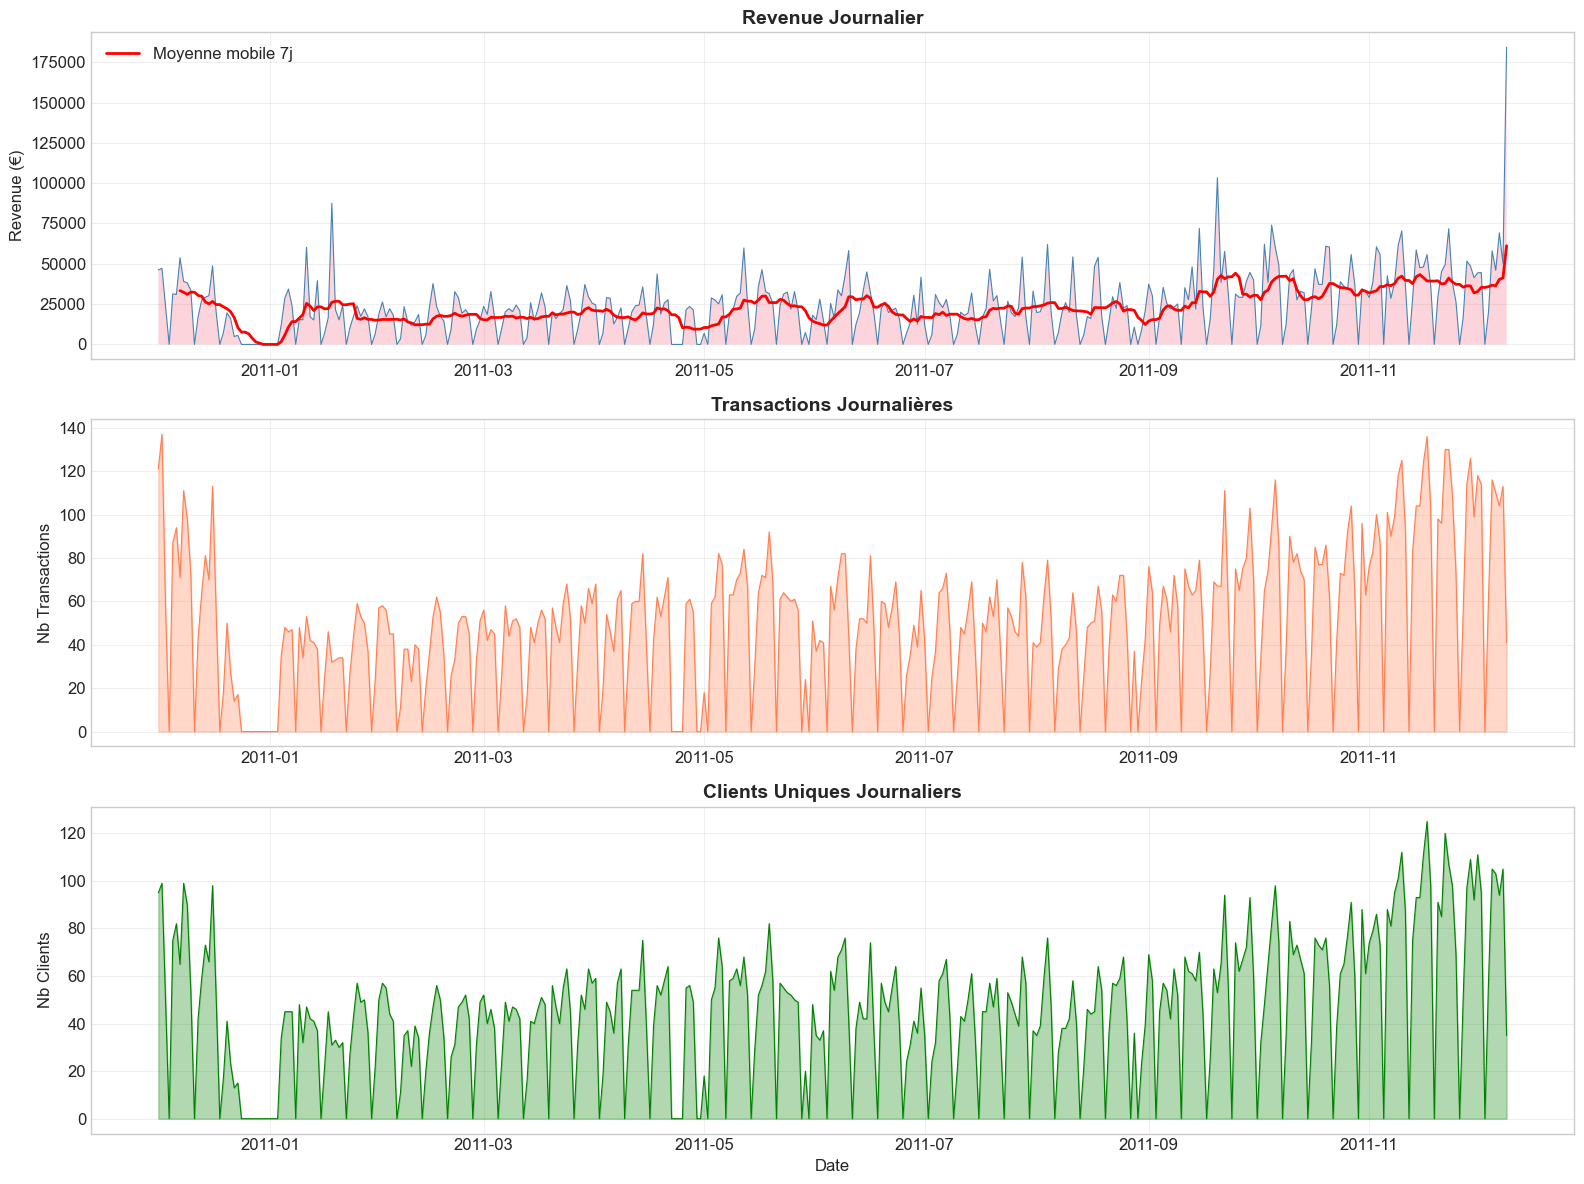

💾 Image sauvegardée : images/17_serie_temporelle.png


In [53]:
# =============================================================================
# VISUALISATION DE LA SÉRIE TEMPORELLE
# =============================================================================

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# 1. Revenue journalier
axes[0].plot(daily_sales.index, daily_sales['Revenue'], color='steelblue', linewidth=0.8)
axes[0].fill_between(daily_sales.index, daily_sales['Revenue'], alpha=0.3)
axes[0].set_title('Revenue Journalier', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue (€)')
axes[0].grid(True, alpha=0.3)

# Ajouter moyenne mobile 7 jours
ma_7 = daily_sales['Revenue'].rolling(window=7).mean()
axes[0].plot(daily_sales.index, ma_7, color='red', linewidth=2, label='Moyenne mobile 7j')
axes[0].legend()

# 2. Transactions journalières
axes[1].plot(daily_sales.index, daily_sales['Transactions'], color='coral', linewidth=0.8)
axes[1].fill_between(daily_sales.index, daily_sales['Transactions'], alpha=0.3, color='coral')
axes[1].set_title('Transactions Journalières', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Nb Transactions')
axes[1].grid(True, alpha=0.3)

# 3. Clients uniques journaliers
axes[2].plot(daily_sales.index, daily_sales['Customers'], color='green', linewidth=0.8)
axes[2].fill_between(daily_sales.index, daily_sales['Customers'], alpha=0.3, color='green')
axes[2].set_title('Clients Uniques Journaliers', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Nb Clients')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/17_serie_temporelle.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/17_serie_temporelle.png")

**Séries hebdo et mensuelle**

📊 AGRÉGATIONS TEMPORELLES
Hebdomadaire : 54 semaines
Mensuel : 13 mois


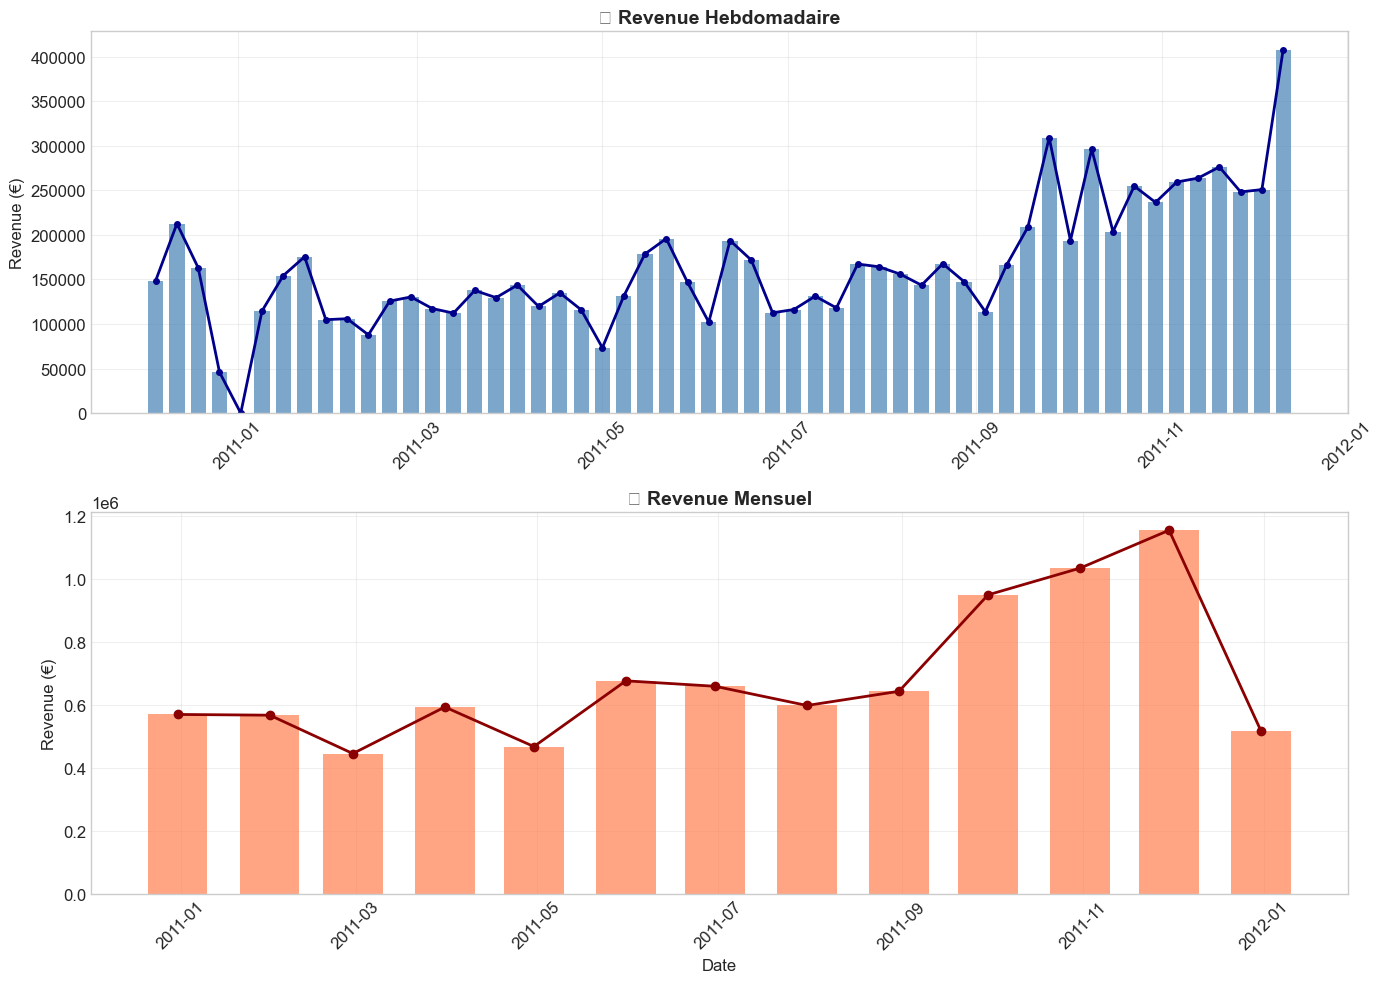

💾 Image sauvegardée : images/18_agregations_temporelles.png


In [54]:
# =============================================================================
# AGRÉGATION HEBDOMADAIRE ET MENSUELLE
# =============================================================================

# Série hebdomadaire
weekly_sales = daily_sales.resample('W').agg({
    'Revenue': 'sum',
    'Transactions': 'sum',
    'Customers': 'sum'
})

# Série mensuelle
monthly_sales = daily_sales.resample('M').agg({
    'Revenue': 'sum',
    'Transactions': 'sum',
    'Customers': 'sum'
})

print("📊 AGRÉGATIONS TEMPORELLES")
print("=" * 50)
print(f"Hebdomadaire : {len(weekly_sales)} semaines")
print(f"Mensuel : {len(monthly_sales)} mois")

# Visualisation
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Hebdomadaire
axes[0].bar(weekly_sales.index, weekly_sales['Revenue'], width=5, color='steelblue', alpha=0.7)
axes[0].plot(weekly_sales.index, weekly_sales['Revenue'], color='darkblue', linewidth=2, marker='o', markersize=4)
axes[0].set_title('📊 Revenue Hebdomadaire', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue (€)')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Mensuel
axes[1].bar(monthly_sales.index, monthly_sales['Revenue'], width=20, color='coral', alpha=0.7)
axes[1].plot(monthly_sales.index, monthly_sales['Revenue'], color='darkred', linewidth=2, marker='o', markersize=6)
axes[1].set_title('📊 Revenue Mensuel', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Revenue (€)')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../images/18_agregations_temporelles.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/18_agregations_temporelles.png")

**Décomposition (Tendance + Saisonnalité + Résidus)**

🔍 DÉCOMPOSITION DE LA SÉRIE TEMPORELLE


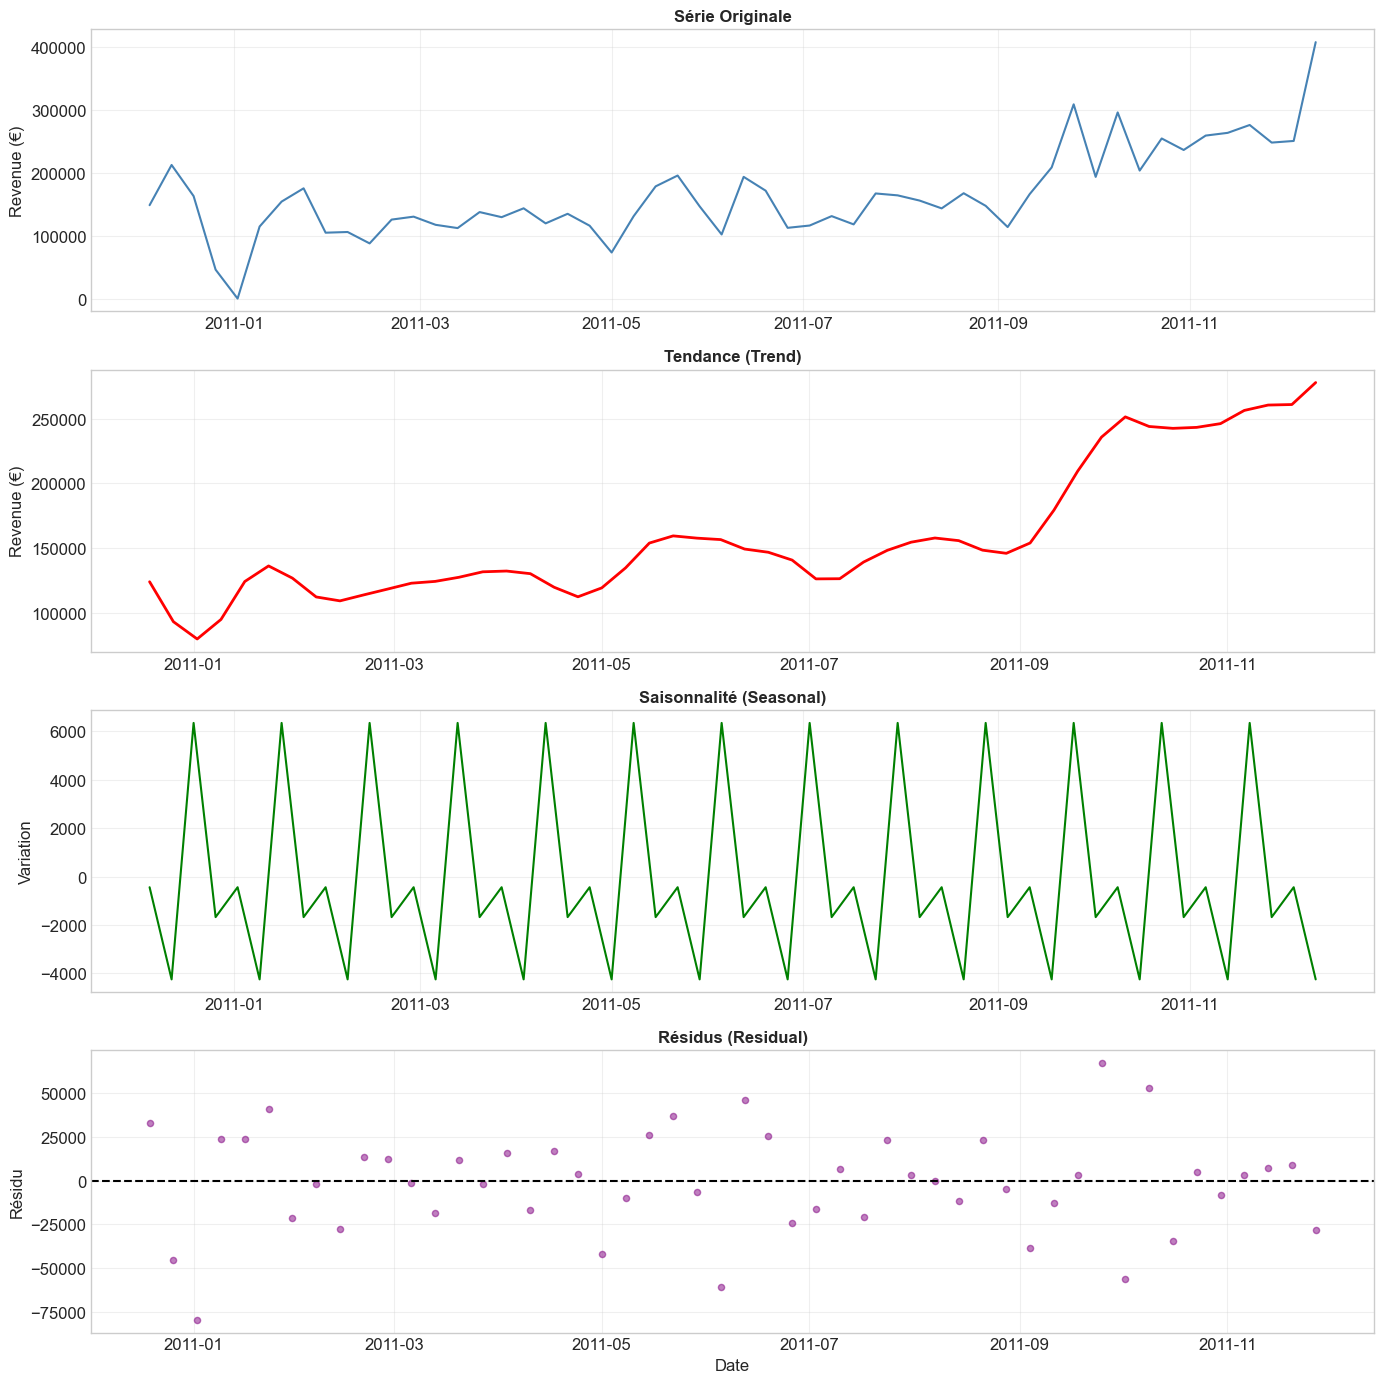

💾 Image sauvegardée : images/19_decomposition.png

📊 Décomposition de la variance :
   • Tendance : 54.6%
   • Saisonnalité : 0.3%
   • Résidus : 17.4%


In [56]:
# =============================================================================
# DÉCOMPOSITION DE LA SÉRIE TEMPORELLE
# =============================================================================

print("=" * 60)
print("🔍 DÉCOMPOSITION DE LA SÉRIE TEMPORELLE")
print("=" * 60)

# On utilise la série hebdomadaire pour plus de clarté
# Décomposition additive
decomposition = seasonal_decompose(weekly_sales['Revenue'], model='additive', period=4)

# Visualisation
fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# 1. Série originale
axes[0].plot(weekly_sales.index, weekly_sales['Revenue'], color='steelblue', linewidth=1.5)
axes[0].set_title('Série Originale', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Revenue (€)')
axes[0].grid(True, alpha=0.3)

# 2. Tendance
axes[1].plot(decomposition.trend.index, decomposition.trend, color='red', linewidth=2)
axes[1].set_title('Tendance (Trend)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Revenue (€)')
axes[1].grid(True, alpha=0.3)

# 3. Saisonnalité
axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, color='green', linewidth=1.5)
axes[2].set_title('Saisonnalité (Seasonal)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Variation')
axes[2].grid(True, alpha=0.3)

# 4. Résidus
axes[3].scatter(decomposition.resid.index, decomposition.resid, color='purple', alpha=0.5, s=20)
axes[3].axhline(y=0, color='black', linestyle='--')
axes[3].set_title('Résidus (Residual)', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Résidu')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/19_decomposition.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/19_decomposition.png")

# Analyse de la variance
total_var = weekly_sales['Revenue'].var()
trend_var = decomposition.trend.dropna().var()
seasonal_var = decomposition.seasonal.var()
resid_var = decomposition.resid.dropna().var()

print(f"\n📊 Décomposition de la variance :")
print(f"   • Tendance : {trend_var/total_var*100:.1f}%")
print(f"   • Saisonnalité : {seasonal_var/total_var*100:.1f}%")
print(f"   • Résidus : {resid_var/total_var*100:.1f}%")

**Test ADF (Augmented Dickey-Fuller)**

In [57]:
# =============================================================================
# TEST DE STATIONNARITÉ - ADF (Augmented Dickey-Fuller)
# =============================================================================

print("=" * 60)
print("🔬 TESTS DE STATIONNARITÉ")
print("=" * 60)

def adf_test(series, name=''):
    """
    Effectue le test ADF et affiche les résultats
    H0 : La série n'est pas stationnaire (présence d'une racine unitaire)
    H1 : La série est stationnaire
    """
    result = adfuller(series.dropna(), autolag='AIC')
    
    print(f"\n📊 Test ADF - {name}")
    print("-" * 50)
    print(f"Statistique ADF : {result[0]:.4f}")
    print(f"P-value : {result[1]:.4f}")
    print(f"Lags utilisés : {result[2]}")
    print(f"Observations : {result[3]}")
    print("Valeurs critiques :")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    
    if result[1] < 0.05:
        print(f"\n✅ Conclusion : Série STATIONNAIRE (p-value < 0.05)")
        return True
    else:
        print(f"\n❌ Conclusion : Série NON STATIONNAIRE (p-value >= 0.05)")
        return False

# Test sur la série originale
is_stationary = adf_test(weekly_sales['Revenue'], 'Revenue Hebdomadaire')

🔬 TESTS DE STATIONNARITÉ

📊 Test ADF - Revenue Hebdomadaire
--------------------------------------------------
Statistique ADF : 0.4392
P-value : 0.9829
Lags utilisés : 3
Observations : 50
Valeurs critiques :
   1%: -3.5685
   5%: -2.9214
   10%: -2.5987

❌ Conclusion : Série NON STATIONNAIRE (p-value >= 0.05)


**Test KPSS**

In [58]:
# =============================================================================
# TEST KPSS (Kwiatkowski-Phillips-Schmidt-Shin)
# =============================================================================

def kpss_test(series, name=''):
    """
    Effectue le test KPSS
    H0 : La série est stationnaire
    H1 : La série n'est pas stationnaire
    """
    result = kpss(series.dropna(), regression='c', nlags='auto')
    
    print(f"\n📊 Test KPSS - {name}")
    print("-" * 50)
    print(f"Statistique KPSS : {result[0]:.4f}")
    print(f"P-value : {result[1]:.4f}")
    print(f"Lags utilisés : {result[2]}")
    print("Valeurs critiques :")
    for key, value in result[3].items():
        print(f"   {key}: {value:.4f}")
    
    if result[1] >= 0.05:
        print(f"\n✅ Conclusion : Série STATIONNAIRE (p-value >= 0.05)")
        return True
    else:
        print(f"\n❌ Conclusion : Série NON STATIONNAIRE (p-value < 0.05)")
        return False

# Test KPSS
kpss_test(weekly_sales['Revenue'], 'Revenue Hebdomadaire')


📊 Test KPSS - Revenue Hebdomadaire
--------------------------------------------------
Statistique KPSS : 0.8975
P-value : 0.0100
Lags utilisés : 4
Valeurs critiques :
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390

❌ Conclusion : Série NON STATIONNAIRE (p-value < 0.05)


False

**Différenciation pour stationnarité**


🔧 DIFFÉRENCIATION DE LA SÉRIE


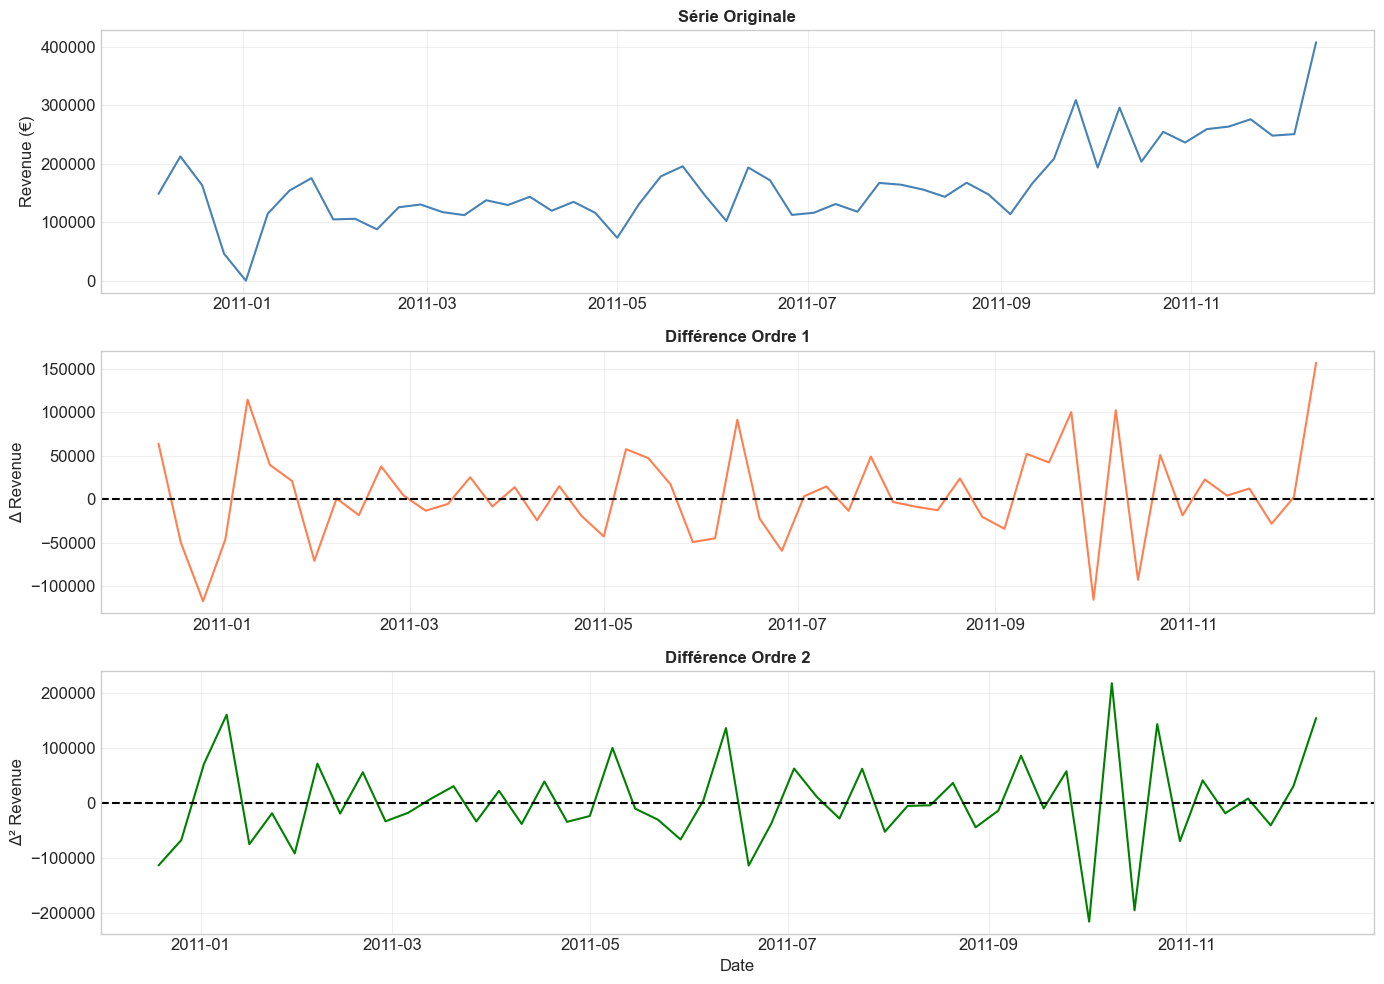

💾 Image sauvegardée : images/20_differenciation.png

📊 Test de stationnarité sur la série différenciée :

📊 Test ADF - Revenue Différencié (ordre 1)
--------------------------------------------------
Statistique ADF : -7.5836
P-value : 0.0000
Lags utilisés : 2
Observations : 50
Valeurs critiques :
   1%: -3.5685
   5%: -2.9214
   10%: -2.5987

✅ Conclusion : Série STATIONNAIRE (p-value < 0.05)


True

In [60]:
# =============================================================================
# DIFFÉRENCIATION POUR OBTENIR LA STATIONNARITÉ
# =============================================================================

print("\n" + "=" * 60)
print("🔧 DIFFÉRENCIATION DE LA SÉRIE")
print("=" * 60)

# Différence d'ordre 1
weekly_sales['Revenue_diff1'] = weekly_sales['Revenue'].diff()

# Différence d'ordre 2 (si nécessaire)
weekly_sales['Revenue_diff2'] = weekly_sales['Revenue'].diff().diff()

# Visualisation
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Série originale
axes[0].plot(weekly_sales.index, weekly_sales['Revenue'], color='steelblue')
axes[0].set_title('Série Originale', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Revenue (€)')
axes[0].grid(True, alpha=0.3)

# Différence ordre 1
axes[1].plot(weekly_sales.index, weekly_sales['Revenue_diff1'], color='coral')
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Différence Ordre 1', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Δ Revenue')
axes[1].grid(True, alpha=0.3)

# Différence ordre 2
axes[2].plot(weekly_sales.index, weekly_sales['Revenue_diff2'], color='green')
axes[2].axhline(y=0, color='black', linestyle='--')
axes[2].set_title('Différence Ordre 2', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Δ² Revenue')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/20_differenciation.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/20_differenciation.png")

# Test ADF sur la série différenciée
print("\n📊 Test de stationnarité sur la série différenciée :")
adf_test(weekly_sales['Revenue_diff1'].dropna(), 'Revenue Différencié (ordre 1)')

**Analyse ACF et PACF**

📊 ANALYSE D'AUTOCORRÉLATION (ACF / PACF)


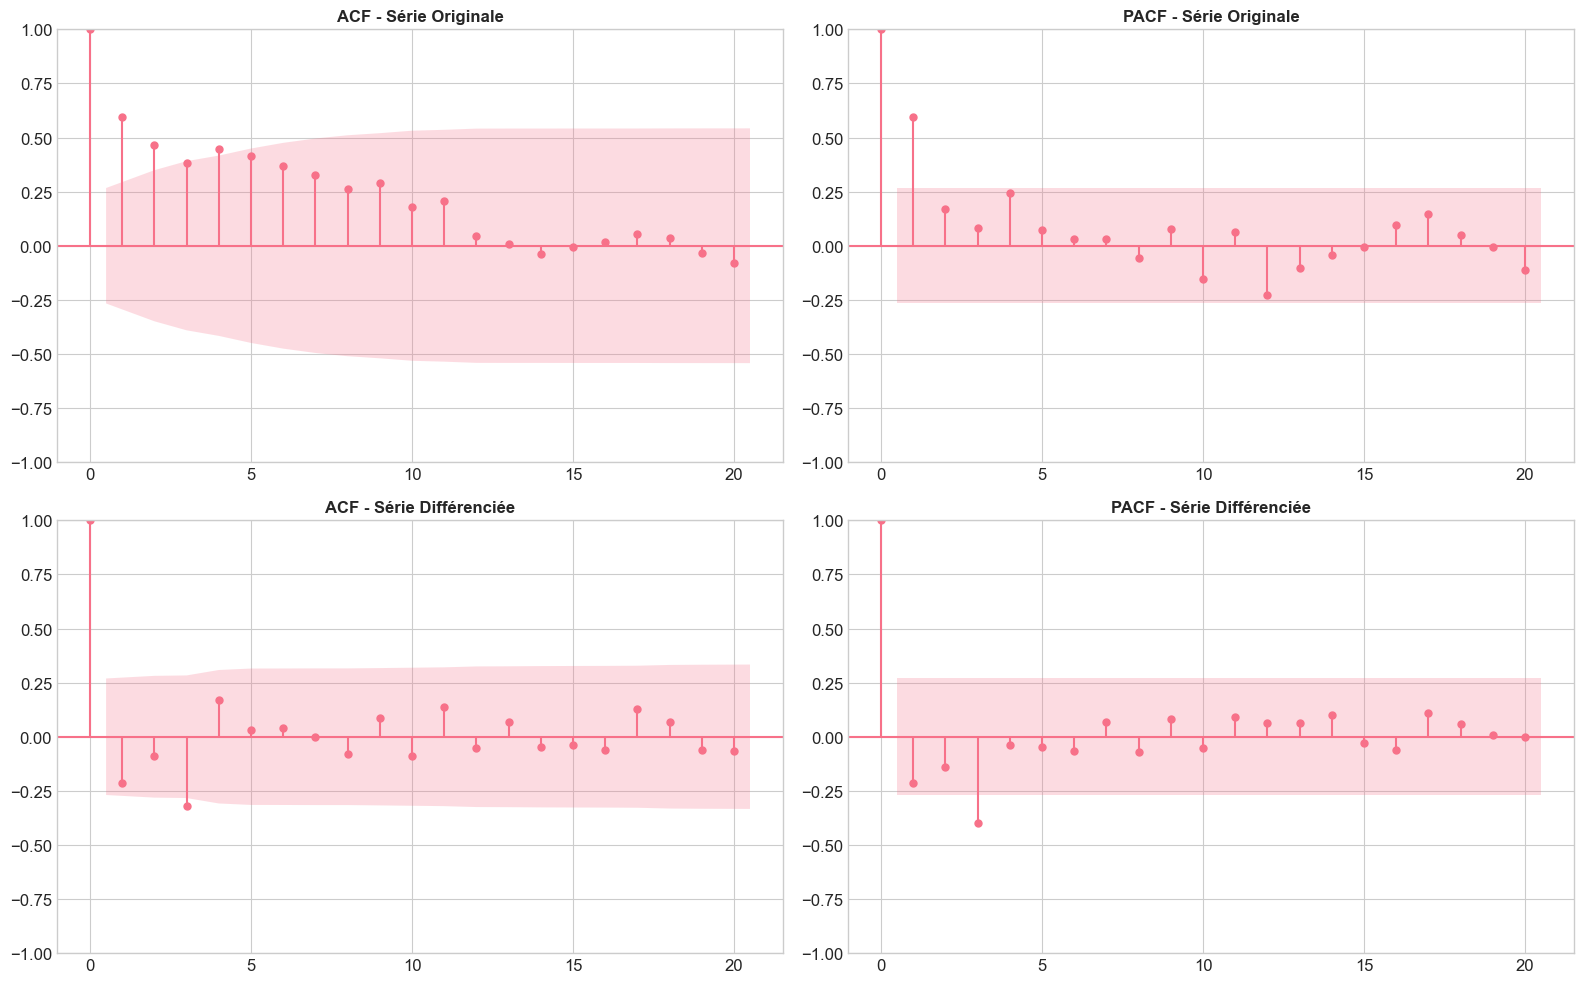

💾 Image sauvegardée : images/21_acf_pacf.png

📌 INTERPRÉTATION ACF/PACF :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• ACF (Autocorrelation Function) : 
  → Décroissance lente = série non stationnaire
  → Décroissance rapide = série stationnaire

• PACF (Partial Autocorrelation Function) :
  → Identifie l'ordre p du modèle AR
  → Coupure nette après lag k → AR(k)

• Pour ARIMA(p,d,q) :
  → p : Nombre de lags significatifs en PACF
  → d : Ordre de différenciation pour stationnarité
  → q : Nombre de lags significatifs en ACF



In [61]:
# =============================================================================
# ANALYSE ACF ET PACF
# =============================================================================

print("=" * 60)
print("📊 ANALYSE D'AUTOCORRÉLATION (ACF / PACF)")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF série originale
plot_acf(weekly_sales['Revenue'].dropna(), ax=axes[0, 0], lags=20, alpha=0.05)
axes[0, 0].set_title('ACF - Série Originale', fontsize=12, fontweight='bold')

# PACF série originale
plot_pacf(weekly_sales['Revenue'].dropna(), ax=axes[0, 1], lags=20, alpha=0.05)
axes[0, 1].set_title('PACF - Série Originale', fontsize=12, fontweight='bold')

# ACF série différenciée
plot_acf(weekly_sales['Revenue_diff1'].dropna(), ax=axes[1, 0], lags=20, alpha=0.05)
axes[1, 0].set_title('ACF - Série Différenciée', fontsize=12, fontweight='bold')

# PACF série différenciée
plot_pacf(weekly_sales['Revenue_diff1'].dropna(), ax=axes[1, 1], lags=20, alpha=0.05)
axes[1, 1].set_title('PACF - Série Différenciée', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/21_acf_pacf.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/21_acf_pacf.png")

print("""
📌 INTERPRÉTATION ACF/PACF :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• ACF (Autocorrelation Function) : 
  → Décroissance lente = série non stationnaire
  → Décroissance rapide = série stationnaire
  
• PACF (Partial Autocorrelation Function) :
  → Identifie l'ordre p du modèle AR
  → Coupure nette après lag k → AR(k)

• Pour ARIMA(p,d,q) :
  → p : Nombre de lags significatifs en PACF
  → d : Ordre de différenciation pour stationnarité
  → q : Nombre de lags significatifs en ACF
""")

**Recherche automatique des paramètres ARIMA**

In [65]:
# =============================================================================
# RECHERCHE AUTOMATIQUE DES PARAMÈTRES ARIMA (Grid Search)
# =============================================================================

print("=" * 60)
print("🤖 RECHERCHE DES MEILLEURS PARAMÈTRES ARIMA")
print("=" * 60)

# Utiliser pmdarima pour la recherche automatique
# !pip install pmdarima

try:
    from pmdarima import auto_arima
    
    # Recherche automatique
    print("🔍 Recherche en cours (peut prendre quelques minutes)...")
    
    auto_model = auto_arima(
        weekly_sales['Revenue'],
        start_p=0, start_q=0,
        max_p=5, max_q=5,
        d=None,  # Laisser auto_arima déterminer d
        seasonal=True,
        m=4,  # Saisonnalité hebdomadaire (4 semaines = ~1 mois)
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        D=None,
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )
    
    print(f"\n✅ Meilleur modèle trouvé : {auto_model.summary()}")
    best_order = auto_model.order
    best_seasonal_order = auto_model.seasonal_order
    
except ImportError:
    print("⚠️ pmdarima non installé. Utilisation des paramètres par défaut.")
    best_order = (1, 1, 1)
    best_seasonal_order = (1, 1, 1, 4)
    
print(f"\n📊 Paramètres ARIMA : {best_order}")
print(f"📊 Paramètres saisonniers : {best_seasonal_order}")

🤖 RECHERCHE DES MEILLEURS PARAMÈTRES ARIMA
🔍 Recherche en cours (peut prendre quelques minutes)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1308.283, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1310.297, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=1307.928, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1306.735, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=1309.407, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=1308.865, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=1309.893, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=1308.987, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=1306.802, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=1310.431, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 0.370 seconds

✅ Meilleur modèle trouvé :                                SARIMAX Results                                
Dep. Variable:

**Entraînement du modèle SARIMA**

In [66]:
# =============================================================================
# SÉPARATION TRAIN / TEST
# =============================================================================

print("=" * 60)
print("📊 PRÉPARATION TRAIN / TEST")
print("=" * 60)

# Série à utiliser
series = weekly_sales['Revenue'].copy()

# Split : 80% train, 20% test
train_size = int(len(series) * 0.8)
train = series[:train_size]
test = series[train_size:]

print(f"📈 Taille totale : {len(series)} observations")
print(f"📊 Train : {len(train)} observations ({len(train)/len(series)*100:.0f}%)")
print(f"📊 Test : {len(test)} observations ({len(test)/len(series)*100:.0f}%)")
print(f"\n📅 Période train : {train.index.min().strftime('%Y-%m-%d')} → {train.index.max().strftime('%Y-%m-%d')}")
print(f"📅 Période test : {test.index.min().strftime('%Y-%m-%d')} → {test.index.max().strftime('%Y-%m-%d')}")

📊 PRÉPARATION TRAIN / TEST
📈 Taille totale : 54 observations
📊 Train : 43 observations (80%)
📊 Test : 11 observations (20%)

📅 Période train : 2010-12-05 → 2011-09-25
📅 Période test : 2011-10-02 → 2011-12-11


In [67]:
# =============================================================================
# ENTRAÎNEMENT DU MODÈLE SARIMA
# =============================================================================

print("=" * 60)
print("🤖 ENTRAÎNEMENT DU MODÈLE SARIMA")
print("=" * 60)

# Paramètres du modèle
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 4)  # (P, D, Q, s) - s=4 pour saisonnalité mensuelle

print(f"📊 SARIMA{order}x{seasonal_order}")

# Entraînement
model = SARIMAX(train, 
                order=order, 
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Résumé du modèle
print("\n📋 RÉSUMÉ DU MODÈLE :")
print(model_fit.summary())

🤖 ENTRAÎNEMENT DU MODÈLE SARIMA
📊 SARIMA(1, 1, 1)x(1, 1, 1, 4)

📋 RÉSUMÉ DU MODÈLE :
                                     SARIMAX Results                                     
Dep. Variable:                           Revenue   No. Observations:                   43
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -386.895
Date:                           Tue, 06 Jan 2026   AIC                            783.790
Time:                                   19:53:35   BIC                            791.119
Sample:                               12-05-2010   HQIC                           786.220
                                    - 09-25-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3515      0.421     

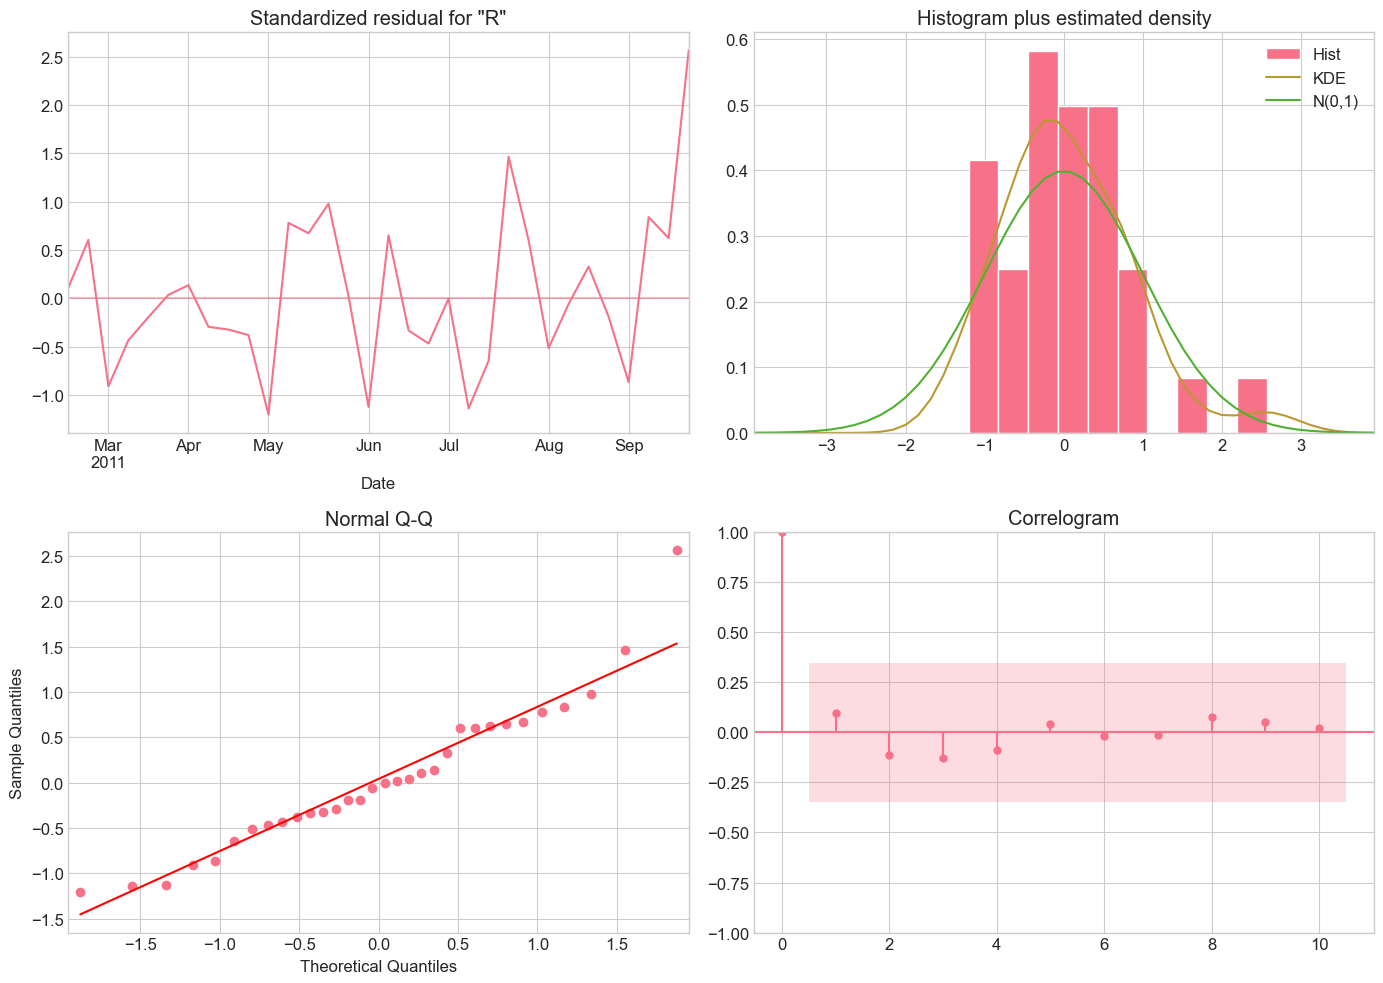

💾 Image sauvegardée : images/22_sarima_diagnostics.png

📌 INTERPRÉTATION DES DIAGNOSTICS :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Standardized residual : Doit ressembler à du bruit blanc
2. Histogram : Doit suivre une distribution normale
3. Normal Q-Q : Points alignés sur la diagonale = normalité
4. Correlogram : Pas de corrélation significative = bon modèle



In [68]:
# =============================================================================
# DIAGNOSTICS DU MODÈLE
# =============================================================================

# Graphiques de diagnostic
fig = model_fit.plot_diagnostics(figsize=(14, 10))
plt.tight_layout()
plt.savefig('../images/22_sarima_diagnostics.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/22_sarima_diagnostics.png")

print("""
📌 INTERPRÉTATION DES DIAGNOSTICS :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Standardized residual : Doit ressembler à du bruit blanc
2. Histogram : Doit suivre une distribution normale
3. Normal Q-Q : Points alignés sur la diagonale = normalité
4. Correlogram : Pas de corrélation significative = bon modèle
""")

🔮 PRÉDICTIONS
✅ 11 prédictions générées


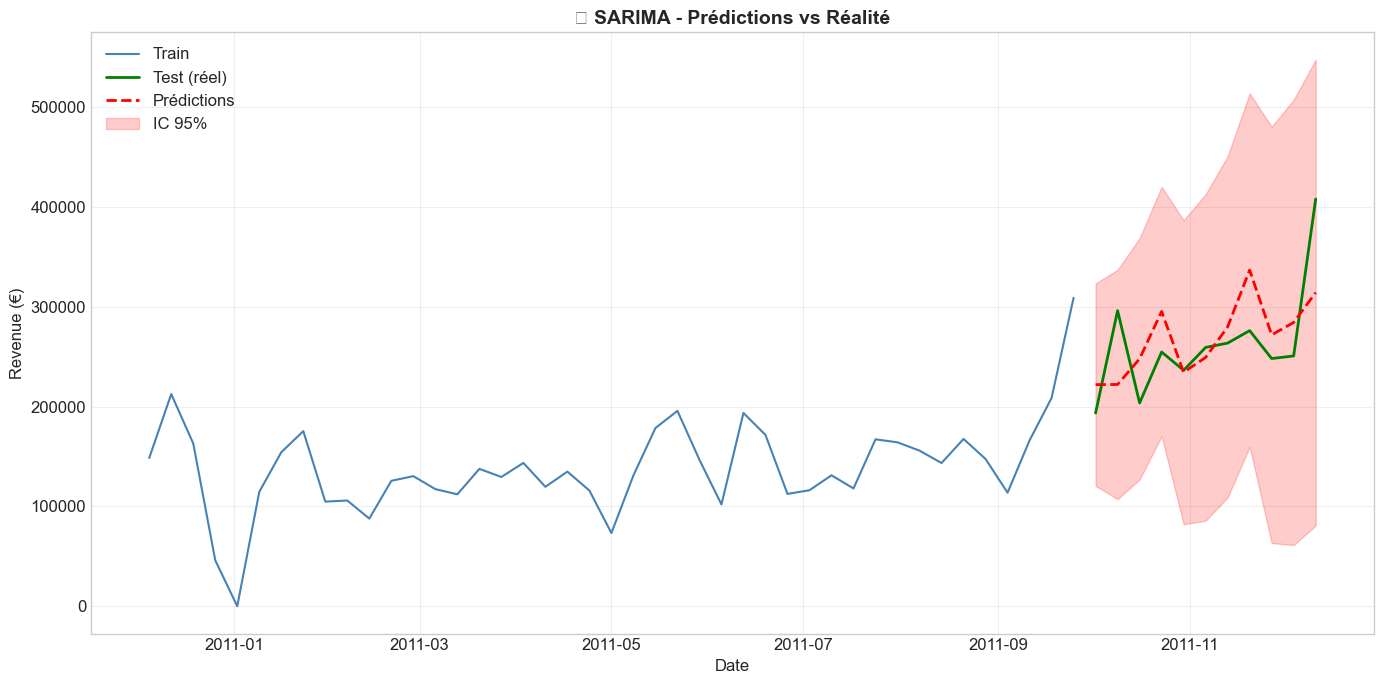

💾 Image sauvegardée : images/23_predictions_sarima.png


In [69]:
# =============================================================================
# PRÉDICTIONS SUR LE JEU DE TEST
# =============================================================================

print("=" * 60)
print("🔮 PRÉDICTIONS")
print("=" * 60)

# Prédictions sur la période de test
predictions = model_fit.forecast(steps=len(test))
predictions.index = test.index

# Intervalle de confiance
forecast = model_fit.get_forecast(steps=len(test))
conf_int = forecast.conf_int(alpha=0.05)
conf_int.index = test.index

print(f"✅ {len(predictions)} prédictions générées")

# Visualisation
fig, ax = plt.subplots(figsize=(14, 7))

# Données d'entraînement
ax.plot(train.index, train, color='steelblue', label='Train', linewidth=1.5)

# Données de test (réelles)
ax.plot(test.index, test, color='green', label='Test (réel)', linewidth=2)

# Prédictions
ax.plot(predictions.index, predictions, color='red', label='Prédictions', linewidth=2, linestyle='--')

# Intervalle de confiance
ax.fill_between(conf_int.index, 
                conf_int.iloc[:, 0], 
                conf_int.iloc[:, 1], 
                color='red', alpha=0.2, label='IC 95%')

ax.set_title('📈 SARIMA - Prédictions vs Réalité', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue (€)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/23_predictions_sarima.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/23_predictions_sarima.png")

In [70]:
# =============================================================================
# MÉTRIQUES D'ÉVALUATION
# =============================================================================

print("=" * 60)
print("📊 ÉVALUATION DU MODÈLE")
print("=" * 60)

# Calcul des métriques
def calculate_metrics(actual, predicted):
    """Calcule les métriques d'évaluation"""
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    # R² (coefficient de détermination)
    ss_res = np.sum((actual - predicted) ** 2)
    ss_tot = np.sum((actual - np.mean(actual)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R²': r2
    }

metrics = calculate_metrics(test.values, predictions.values)

print("┌─────────────────────────────────────────────┐")
print("│           MÉTRIQUES DE PERFORMANCE          │")
print("├─────────────────────────────────────────────┤")
print(f"│  MAE (Mean Absolute Error)    : {metrics['MAE']:>12,.2f} €  │")
print(f"│  RMSE (Root Mean Square Error): {metrics['RMSE']:>12,.2f} €  │")
print(f"│  MAPE (Mean Abs % Error)      : {metrics['MAPE']:>12.2f} %   │")
print(f"│  R² (Coefficient détermination): {metrics['R²']:>11.4f}     │")
print("└─────────────────────────────────────────────┘")

# Interprétation
print("\n📌 INTERPRÉTATION :")
if metrics['MAPE'] < 10:
    print("   ✅ MAPE < 10% : Excellente précision")
elif metrics['MAPE'] < 20:
    print("   ✅ MAPE < 20% : Bonne précision")
elif metrics['MAPE'] < 30:
    print("   ⚠️ MAPE < 30% : Précision acceptable")
else:
    print("   ❌ MAPE > 30% : Précision insuffisante")

if metrics['R²'] > 0.8:
    print(f"   ✅ R² = {metrics['R²']:.2f} : Le modèle explique bien la variance")
elif metrics['R²'] > 0.5:
    print(f"   ⚠️ R² = {metrics['R²']:.2f} : Le modèle explique partiellement la variance")
else:
    print(f"   ❌ R² = {metrics['R²']:.2f} : Le modèle a du mal à expliquer la variance")

📊 ÉVALUATION DU MODÈLE
┌─────────────────────────────────────────────┐
│           MÉTRIQUES DE PERFORMANCE          │
├─────────────────────────────────────────────┤
│  MAE (Mean Absolute Error)    :    38,852.28 €  │
│  RMSE (Root Mean Square Error):    47,116.52 €  │
│  MAPE (Mean Abs % Error)      :        14.19 %   │
│  R² (Coefficient détermination):      0.2318     │
└─────────────────────────────────────────────┘

📌 INTERPRÉTATION :
   ✅ MAPE < 20% : Bonne précision
   ❌ R² = 0.23 : Le modèle a du mal à expliquer la variance



📊 STATISTIQUES DES ERREURS :
----------------------------------------
Erreur moyenne : -6,186.41 €
Erreur médiane : -23,684.83 €
Écart-type : 48,988.41 €
Erreur min : -60,703.66 €
Erreur max : 93,693.70 €


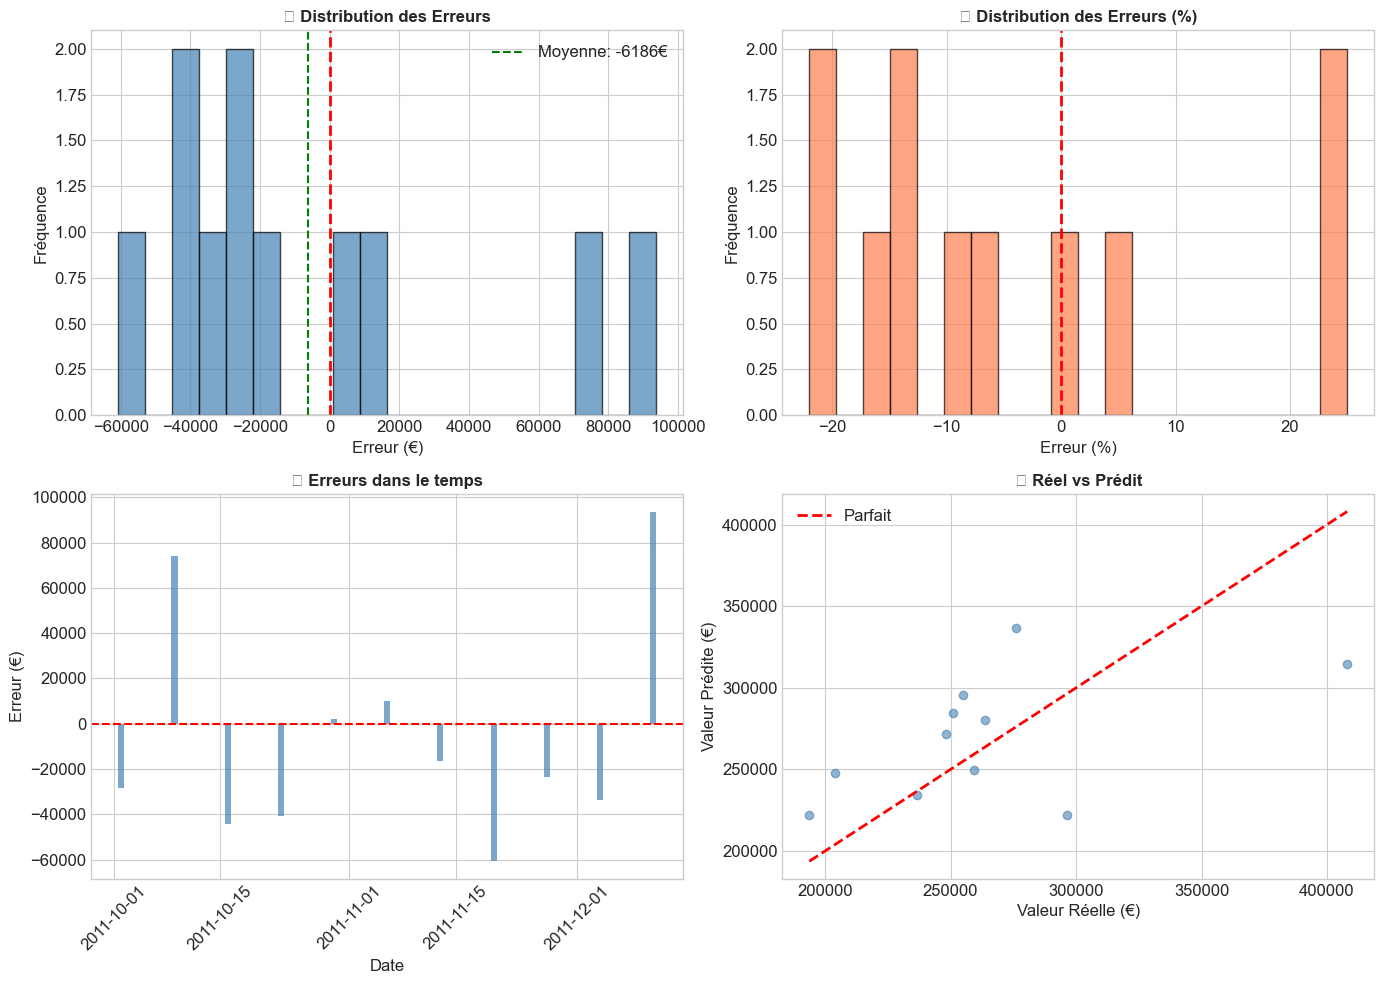


💾 Image sauvegardée : images/24_analyse_erreurs.png


In [71]:
# =============================================================================
# ANALYSE DES ERREURS
# =============================================================================

# Calcul des erreurs
errors = test - predictions
errors_pct = (errors / test) * 100

# Statistiques des erreurs
print("\n📊 STATISTIQUES DES ERREURS :")
print("-" * 40)
print(f"Erreur moyenne : {errors.mean():,.2f} €")
print(f"Erreur médiane : {errors.median():,.2f} €")
print(f"Écart-type : {errors.std():,.2f} €")
print(f"Erreur min : {errors.min():,.2f} €")
print(f"Erreur max : {errors.max():,.2f} €")

# Visualisation des erreurs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution des erreurs
axes[0, 0].hist(errors, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].axvline(x=errors.mean(), color='green', linestyle='--', label=f'Moyenne: {errors.mean():.0f}€')
axes[0, 0].set_title('📊 Distribution des Erreurs', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Erreur (€)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].legend()

# 2. Erreurs en pourcentage
axes[0, 1].hist(errors_pct, bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('📊 Distribution des Erreurs (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Erreur (%)')
axes[0, 1].set_ylabel('Fréquence')

# 3. Erreurs dans le temps
axes[1, 0].bar(errors.index, errors, color='steelblue', alpha=0.7)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_title('📈 Erreurs dans le temps', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Erreur (€)')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot Réel vs Prédit
axes[1, 1].scatter(test, predictions, alpha=0.6, color='steelblue')
max_val = max(test.max(), predictions.max())
min_val = min(test.min(), predictions.min())
axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Parfait')
axes[1, 1].set_title('📊 Réel vs Prédit', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Valeur Réelle (€)')
axes[1, 1].set_ylabel('Valeur Prédite (€)')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../images/24_analyse_erreurs.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💾 Image sauvegardée : images/24_analyse_erreurs.png")

In [72]:
# =============================================================================
# 🔮 PRÉVISIONS FUTURES
# =============================================================================

print("=" * 60)
print("🔮 PRÉVISIONS FUTURES")
print("=" * 60)

# Réentraîner sur toutes les données
model_full = SARIMAX(series, 
                     order=order, 
                     seasonal_order=seasonal_order,
                     enforce_stationarity=False,
                     enforce_invertibility=False)

model_full_fit = model_full.fit(disp=False)

# Prévisions pour les 12 prochaines semaines (3 mois)
n_forecast = 12
future_forecast = model_full_fit.get_forecast(steps=n_forecast)

# Créer les dates futures
last_date = series.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=n_forecast, freq='W')

# Extraire les prévisions et intervalles de confiance
future_predictions = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int(alpha=0.05)

# Créer un DataFrame des prévisions
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Prévision': future_predictions.values,
    'IC_Lower': future_conf_int.iloc[:, 0].values,
    'IC_Upper': future_conf_int.iloc[:, 1].values
})
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
forecast_df = forecast_df.set_index('Date')

print(f"\n📊 PRÉVISIONS POUR LES {n_forecast} PROCHAINES SEMAINES :")
print("-" * 60)
print(forecast_df.round(2).to_string())

print(f"\n💰 Revenue prévu total : {forecast_df['Prévision'].sum():,.2f} €")
print(f"💰 Revenue moyen prévu/semaine : {forecast_df['Prévision'].mean():,.2f} €")

🔮 PRÉVISIONS FUTURES

📊 PRÉVISIONS POUR LES 12 PROCHAINES SEMAINES :
------------------------------------------------------------
            Prévision   IC_Lower   IC_Upper
Date                                       
2011-12-18  342232.69  227152.44  457312.94
2011-12-25  307083.73  185860.74  428306.71
2012-01-01  331057.02  204521.43  457592.60
2012-01-08  389322.87  257700.76  520944.98
2012-01-15  379091.08  222749.66  535432.49
2012-01-22  345217.22  180400.65  510033.78
2012-01-29  369374.17  196725.53  542022.80
2012-02-05  426935.77  246800.40  607071.15
2012-02-12  417099.95  211528.98  622670.93
2012-02-19  383235.18  166968.69  599501.67
2012-02-26  407393.44  181158.32  633628.56
2012-03-04  464950.02  229172.38  700727.67

💰 Revenue prévu total : 4,562,993.13 €
💰 Revenue moyen prévu/semaine : 380,249.43 €


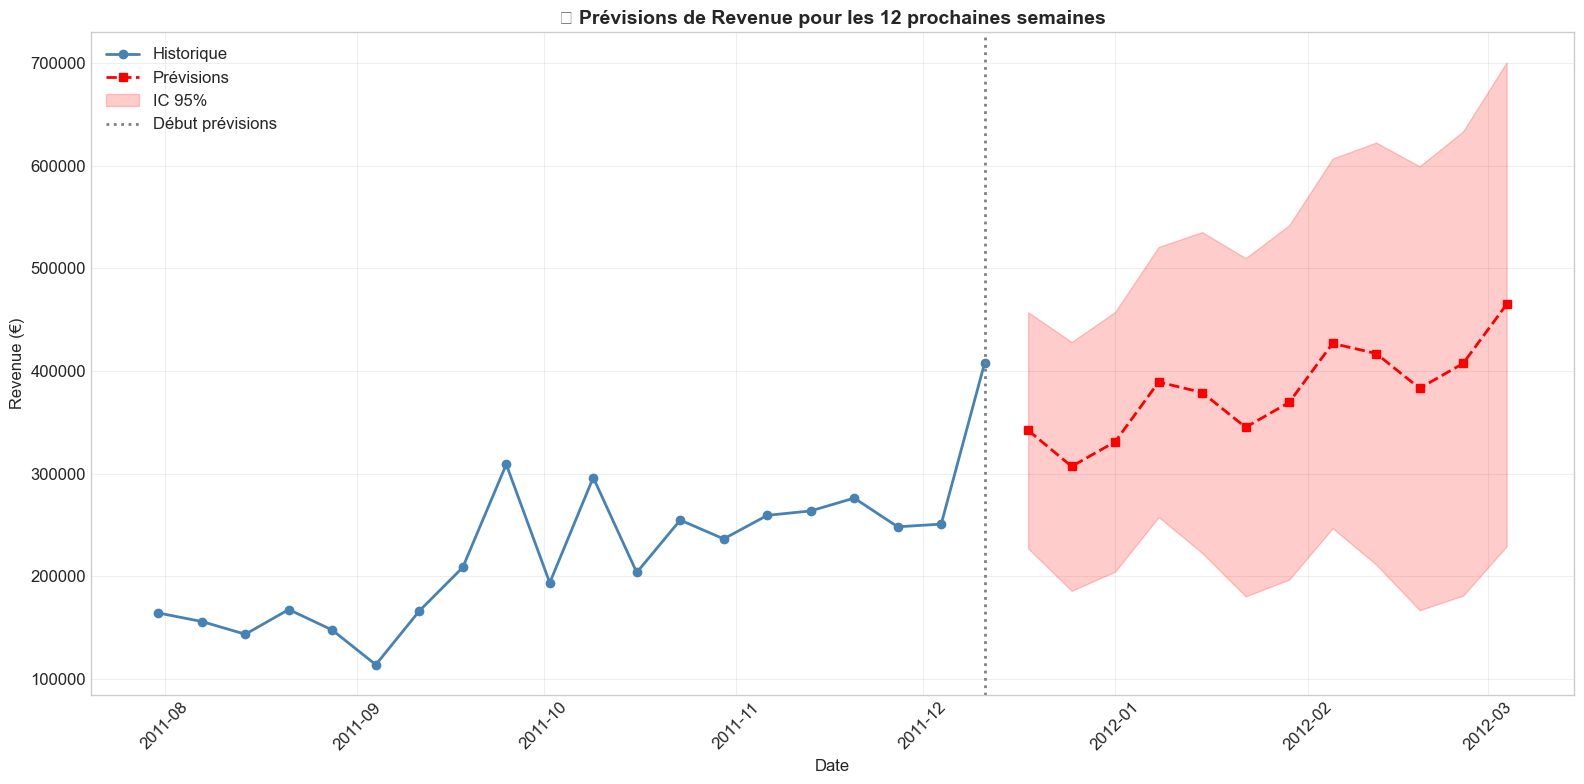

💾 Image sauvegardée : images/25_previsions_futures.png


In [73]:
# =============================================================================
# VISUALISATION DES PRÉVISIONS FUTURES
# =============================================================================

fig, ax = plt.subplots(figsize=(16, 8))

# Données historiques (dernières 20 semaines pour plus de clarté)
recent_data = series.tail(20)
ax.plot(recent_data.index, recent_data, color='steelblue', linewidth=2, label='Historique', marker='o')

# Prévisions
ax.plot(forecast_df.index, forecast_df['Prévision'], color='red', linewidth=2, 
        linestyle='--', label='Prévisions', marker='s')

# Intervalle de confiance
ax.fill_between(forecast_df.index, 
                forecast_df['IC_Lower'], 
                forecast_df['IC_Upper'], 
                color='red', alpha=0.2, label='IC 95%')

# Ligne de séparation
ax.axvline(x=series.index.max(), color='gray', linestyle=':', linewidth=2, label='Début prévisions')

ax.set_title('🔮 Prévisions de Revenue pour les 12 prochaines semaines', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue (€)')
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Rotation des labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../images/25_previsions_futures.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Image sauvegardée : images/25_previsions_futures.png")

**Modèle Prophet (Facebook) - BONUS**

In [76]:
# =============================================================================
# 🔮 MODÈLE PROPHET (FACEBOOK) - BONUS
# =============================================================================

try:
    from prophet import Prophet
    
    print("=" * 60)
    print("🔮 MODÈLE PROPHET (FACEBOOK)")
    print("=" * 60)
    
    # Préparation des données pour Prophet
    # Prophet nécessite des colonnes 'ds' (date) et 'y' (valeur)
    prophet_df = weekly_sales[['Revenue']].reset_index()
    prophet_df.columns = ['ds', 'y']
    
    print(f"✅ Données préparées : {len(prophet_df)} observations")
    
    prophet_available = True
    
except ImportError:
    print("⚠️ Prophet non installé. Passez à l'étape suivante.")
    prophet_available = False

🔮 MODÈLE PROPHET (FACEBOOK)
✅ Données préparées : 54 observations


In [77]:
# =============================================================================
# ENTRAÎNEMENT DU MODÈLE PROPHET
# =============================================================================

if prophet_available:
    # Créer et configurer le modèle
    model_prophet = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.05
    )
    
    # Entraîner le modèle
    print("🔧 Entraînement en cours...")
    model_prophet.fit(prophet_df)
    print("✅ Modèle entraîné!")
    
    # Créer les dates futures
    future_prophet = model_prophet.make_future_dataframe(periods=12, freq='W')
    
    # Prédictions
    forecast_prophet = model_prophet.predict(future_prophet)
    
    print(f"✅ {len(forecast_prophet)} prédictions générées (historique + futur)")

19:58:44 - cmdstanpy - INFO - Chain [1] start processing


🔧 Entraînement en cours...


19:58:45 - cmdstanpy - INFO - Chain [1] done processing


✅ Modèle entraîné!
✅ 66 prédictions générées (historique + futur)


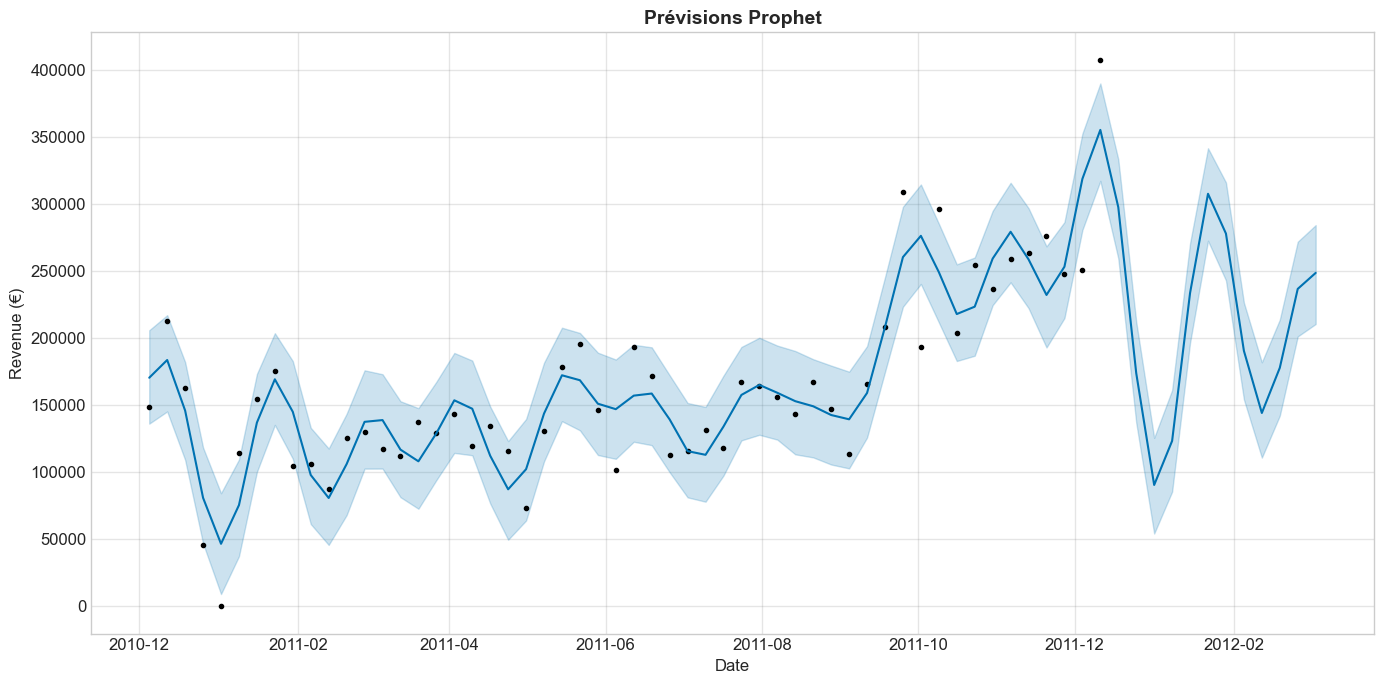

💾 Image sauvegardée : images/26_prophet_forecast.png


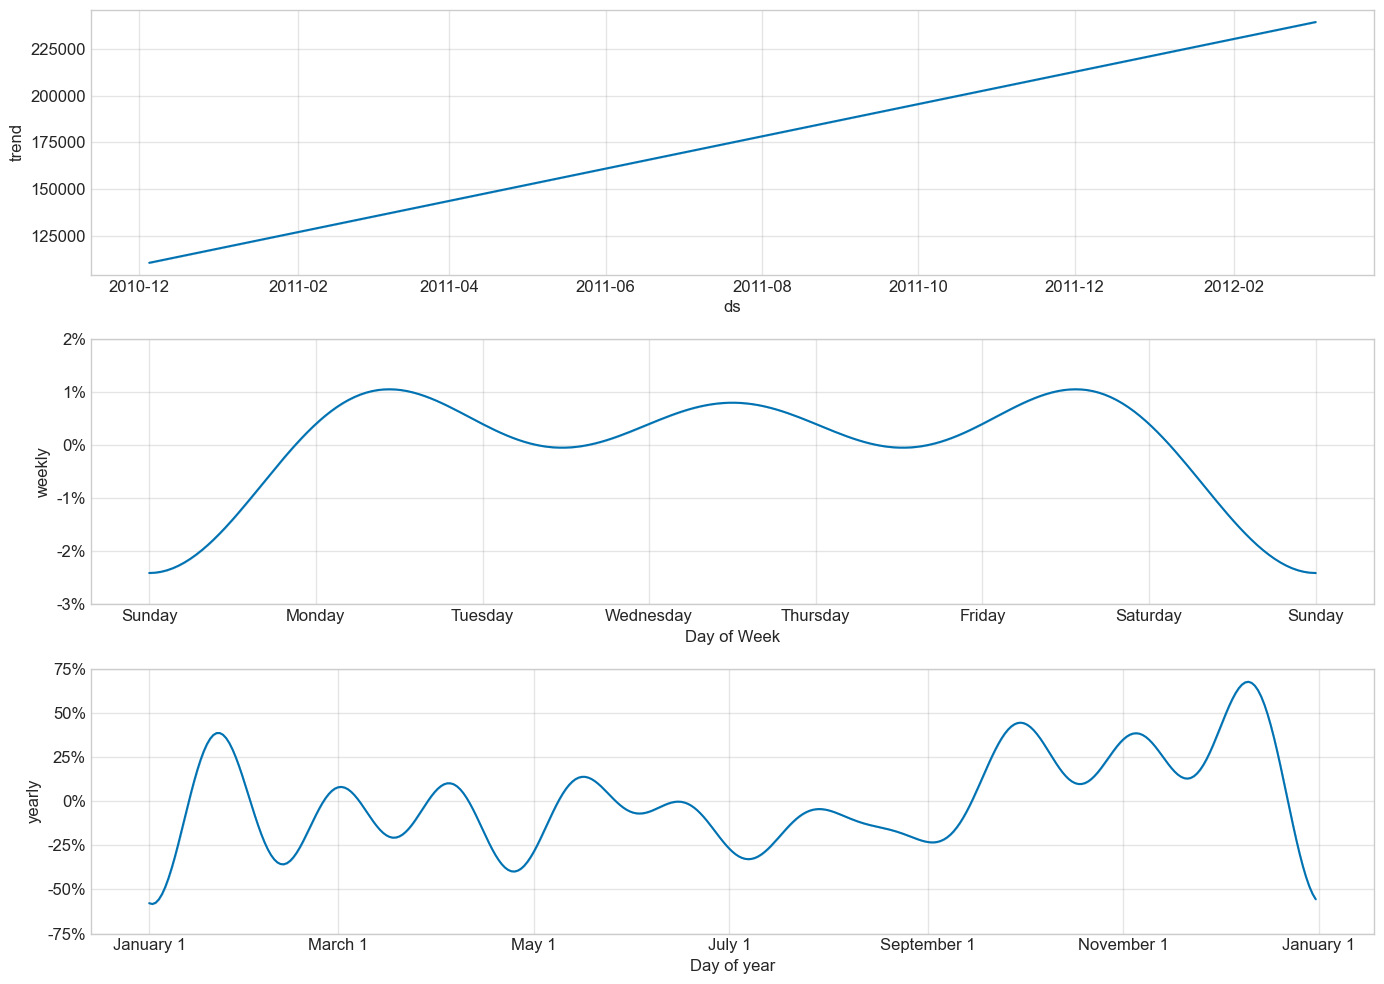

💾 Image sauvegardée : images/27_prophet_components.png


In [79]:
# =============================================================================
# VISUALISATION PROPHET
# =============================================================================

if prophet_available:
    # Graphique des prévisions
    fig1 = model_prophet.plot(forecast_prophet, figsize=(14, 7))
    plt.title('Prévisions Prophet', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Revenue (€)')
    plt.tight_layout()
    plt.savefig('../images/26_prophet_forecast.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("💾 Image sauvegardée : images/26_prophet_forecast.png")
    
    # Composantes (tendance + saisonnalité)
    fig2 = model_prophet.plot_components(forecast_prophet, figsize=(14, 10))
    plt.tight_layout()
    plt.savefig('../images/27_prophet_components.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("💾 Image sauvegardée : images/27_prophet_components.png")

**Comparaison des modèles**

📊 COMPARAISON DES MODÈLES

🔹 SARIMA :
   • RMSE : 47,116.52 €
   • MAPE : 14.19%
   • R² : 0.2318

🔹 PROPHET :
   • RMSE : 43,213.82 €
   • MAPE : 14.11%
   • R² : 0.3538

📊 TABLEAU COMPARATIF :
Métrique       SARIMA      Prophet
RMSE (€) 47116.524344 43213.816056
MAPE (%)    14.194001    14.112703
      R²     0.231762     0.353759


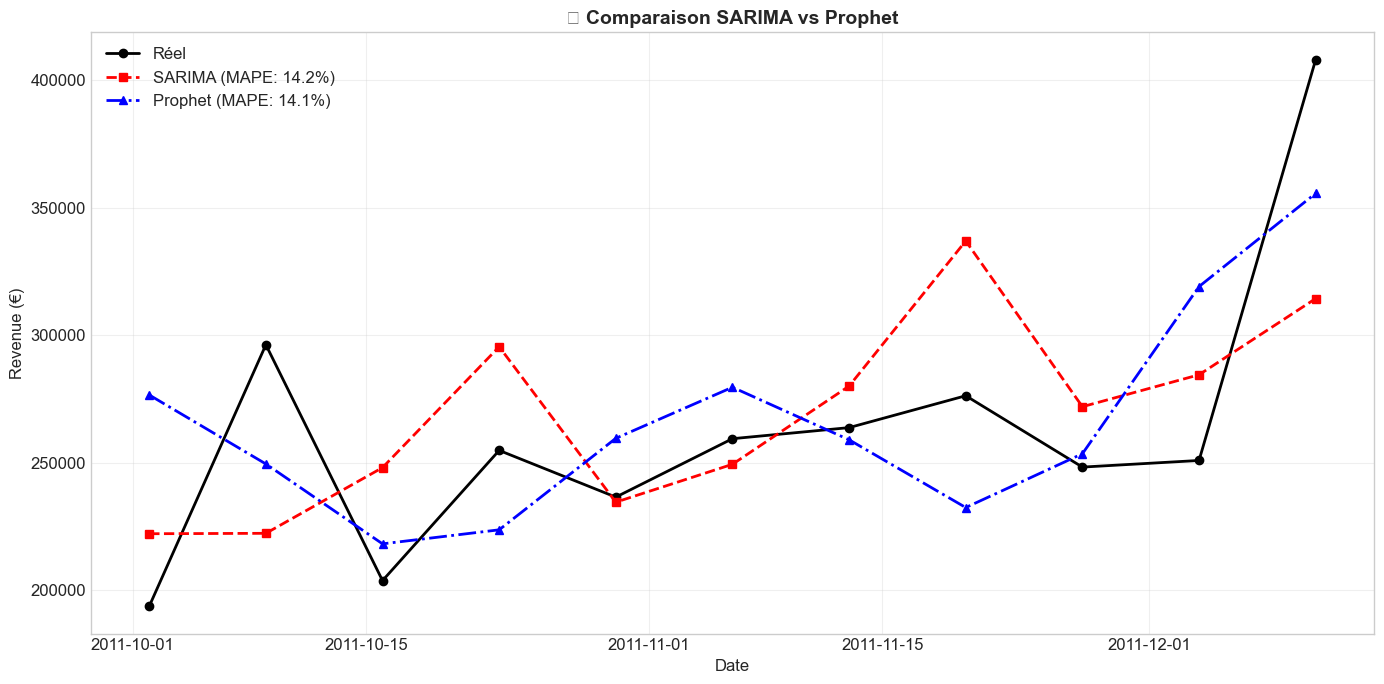


💾 Image sauvegardée : images/28_comparaison_modeles.png


In [80]:
# =============================================================================
# 📊 COMPARAISON DES MODÈLES
# =============================================================================

print("=" * 60)
print("📊 COMPARAISON DES MODÈLES")
print("=" * 60)

# Métriques SARIMA (déjà calculées)
print("\n🔹 SARIMA :")
print(f"   • RMSE : {metrics['RMSE']:,.2f} €")
print(f"   • MAPE : {metrics['MAPE']:.2f}%")
print(f"   • R² : {metrics['R²']:.4f}")

# Métriques Prophet (si disponible)
if prophet_available:
    # Calculer les métriques sur la période de test
    prophet_test = forecast_prophet[forecast_prophet['ds'].isin(test.index)]
    
    if len(prophet_test) > 0:
        prophet_predictions = prophet_test['yhat'].values
        prophet_actual = test.loc[prophet_test['ds']].values
        
        prophet_metrics = calculate_metrics(prophet_actual, prophet_predictions)
        
        print("\n🔹 PROPHET :")
        print(f"   • RMSE : {prophet_metrics['RMSE']:,.2f} €")
        print(f"   • MAPE : {prophet_metrics['MAPE']:.2f}%")
        print(f"   • R² : {prophet_metrics['R²']:.4f}")
        
        # Tableau comparatif
        comparison_df = pd.DataFrame({
            'Métrique': ['RMSE (€)', 'MAPE (%)', 'R²'],
            'SARIMA': [metrics['RMSE'], metrics['MAPE'], metrics['R²']],
            'Prophet': [prophet_metrics['RMSE'], prophet_metrics['MAPE'], prophet_metrics['R²']]
        })
        
        print("\n📊 TABLEAU COMPARATIF :")
        print(comparison_df.to_string(index=False))
        
        # Visualisation comparative
        fig, ax = plt.subplots(figsize=(14, 7))
        
        ax.plot(test.index, test, color='black', linewidth=2, label='Réel', marker='o')
        ax.plot(test.index, predictions, color='red', linewidth=2, linestyle='--', 
                label=f'SARIMA (MAPE: {metrics["MAPE"]:.1f}%)', marker='s')
        ax.plot(prophet_test['ds'], prophet_predictions, color='blue', linewidth=2, 
                linestyle='-.', label=f'Prophet (MAPE: {prophet_metrics["MAPE"]:.1f}%)', marker='^')
        
        ax.set_title('📊 Comparaison SARIMA vs Prophet', fontsize=14, fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Revenue (€)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('../images/28_comparaison_modeles.png', dpi=150, bbox_inches='tight')
        plt.show()
        print("\n💾 Image sauvegardée : images/28_comparaison_modeles.png")

**Synthèse Séries Temporelles**

In [82]:
# =============================================================================
# 📋 SYNTHÈSE ANALYSE SÉRIES TEMPORELLES
# =============================================================================

print("=" * 70)
print("📋 SYNTHÈSE - ANALYSE SÉRIES TEMPORELLES")
print("=" * 70)

synthese_ts = """
┌─────────────────────────────────────────────────────────────────────┐
│                 ANALYSES DE SÉRIES TEMPORELLES                       │
├─────────────────────────────────────────────────────────────────────┤
│                                                                      │
│  📊 EXPLORATION TEMPORELLE                                           │
│     • Agrégations : journalière, hebdomadaire, mensuelle            │
│     • Décomposition : Tendance + Saisonnalité + Résidus             │
│     • Identification des patterns temporels                          │
│                                                                      │
│  🔬 TESTS STATISTIQUES                                               │
│     • Test ADF (Augmented Dickey-Fuller) - Stationnarité            │
│     • Test KPSS - Confirmation stationnarité                         │
│     • Différenciation pour obtenir la stationnarité                  │
│                                                                      │
│  📈 ANALYSE D'AUTOCORRÉLATION                                        │
│     • ACF (Autocorrelation Function)                                 │
│     • PACF (Partial Autocorrelation Function)                        │
│     • Identification des paramètres ARIMA (p, d, q)                  │
│                                                                      │
│  🤖 MODÉLISATION                                                     │
│     • SARIMA (Seasonal ARIMA)                                        │
│     • Prophet (Facebook) - si disponible                             │
│     • Grid Search pour optimisation des paramètres                   │
│                                                                      │
│  📊 ÉVALUATION                                                       │
│     • Métriques : MAE, RMSE, MAPE, R²                               │
│     • Analyse des résidus et diagnostics                             │
│     • Comparaison des modèles                                        │
│                                                                      │
│  🔮 PRÉVISIONS                                                       │
│     • Prévisions 12 semaines avec intervalles de confiance          │
│     • Quantification de l'incertitude                                │
│                                                                      │
└─────────────────────────────────────────────────────────────────────┘

📌 RÉSULTATS CLÉS :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Meilleur modèle : SARIMA{order}x{seasonal_order}
• MAPE : {mape:.2f}% (précision des prévisions)
• Revenue prévu (12 sem) : {revenue_prevu:,.0f} €
• Saisonnalité identifiée : hebdomadaire + mensuelle

🛠️ COMPÉTENCES TECHNIQUES DÉMONTRÉES :
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Statsmodels (ARIMA, SARIMAX, décomposition)
• Tests statistiques avancés (ADF, KPSS)
• Analyse ACF/PACF
• Prophet (Facebook)
• Évaluation de modèles prédictifs

👤 Auteur : Abderrahmane NAJEH
""".format(
    order=order,
    seasonal_order=seasonal_order,
    mape=metrics['MAPE'],
    revenue_prevu=forecast_df['Prévision'].sum(),
)

print(synthese_ts)

📋 SYNTHÈSE - ANALYSE SÉRIES TEMPORELLES

┌─────────────────────────────────────────────────────────────────────┐
│                 ANALYSES DE SÉRIES TEMPORELLES                       │
├─────────────────────────────────────────────────────────────────────┤
│                                                                      │
│  📊 EXPLORATION TEMPORELLE                                           │
│     • Agrégations : journalière, hebdomadaire, mensuelle            │
│     • Décomposition : Tendance + Saisonnalité + Résidus             │
│     • Identification des patterns temporels                          │
│                                                                      │
│  🔬 TESTS STATISTIQUES                                               │
│     • Test ADF (Augmented Dickey-Fuller) - Stationnarité            │
│     • Test KPSS - Confirmation stationnarité                         │
│     • Différenciation pour obtenir la stationnarité                  │
│                